https://archive.ics.uci.edu/ml/datasets/Breast+Cancer+Coimbra

In [33]:
import numpy as np
import pandas as pd
from functools import reduce

import scipy
from scipy import stats

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn

import warnings

warnings.filterwarnings('ignore')
seaborn.set_theme()

# Data Wrangling

In [35]:
df = pd.read_csv('cancer_data.csv', sep=',')

df['Classification'] = list(map(lambda x: int(x == 2), df['Classification']))

df.head()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
0,48,23.500000,70,2.707,0.467409,8.8071,9.702400,7.99585,417.114,0
1,83,20.690495,92,3.115,0.706897,8.8438,5.429285,4.06405,468.786,0
2,82,23.124670,91,4.498,1.009651,17.9393,22.432040,9.27715,554.697,0
3,68,21.367521,77,3.226,0.612725,9.8827,7.169560,12.76600,928.220,0
4,86,21.111111,92,3.549,0.805386,6.6994,4.819240,10.57635,773.920,0


In [36]:
df.isna().sum()

Age               0
BMI               0
Glucose           0
Insulin           0
HOMA              0
Leptin            0
Adiponectin       0
Resistin          0
MCP.1             0
Classification    0
dtype: int64

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 116 entries, 0 to 115
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             116 non-null    int64  
 1   BMI             116 non-null    float64
 2   Glucose         116 non-null    int64  
 3   Insulin         116 non-null    float64
 4   HOMA            116 non-null    float64
 5   Leptin          116 non-null    float64
 6   Adiponectin     116 non-null    float64
 7   Resistin        116 non-null    float64
 8   MCP.1           116 non-null    float64
 9   Classification  116 non-null    int64  
dtypes: float64(7), int64(3)
memory usage: 9.2 KB


In [38]:
df.describe()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
count,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000,116.000000
mean,57.301724,27.582111,97.793103,10.012086,2.694988,26.615080,10.180874,14.725966,534.647000,0.551724
std,16.112766,5.020136,22.525162,10.067768,3.642043,19.183294,6.843341,12.390646,345.912663,0.499475
min,24.000000,18.370000,60.000000,2.432000,0.467409,4.311000,1.656020,3.210000,45.843000,0.000000
25%,45.000000,22.973205,85.750000,4.359250,0.917966,12.313675,5.474282,6.881763,269.978250,0.000000
50%,56.000000,27.662416,92.000000,5.924500,1.380939,20.271000,8.352692,10.827740,471.322500,1.000000
75%,71.000000,31.241442,102.000000,11.189250,2.857787,37.378300,11.815970,17.755207,700.085000,1.000000
max,89.000000,38.578759,201.000000,58.460000,25.050342,90.280000,38.040000,82.100000,1698.440000,1.000000


# Univariate Variable Analysis

In [108]:
# Creates an empty, default subplot
def create_subplot(size, title, xlabel, ylabel):
    figure, ax = plt.subplots(*(1, size), figsize=(40, 10))
    return figure, ax

# Plots a Histogram of given data
def plot_histogram(df, column, title='', xlabel='', ylabel=''):
    figure, ax = create_subplot(3, title, xlabel, ylabel)

    total_freq, test_freq, control_freq = 0, 0, 0
    # Combined [0]
    total_freq, _, _ = ax[0].hist(df[column], density=True, alpha=0.5, label='Combined', color='steelblue')
    # Test [1]
    test_freq, _, _ = ax[1].hist(df[df['Classification'] == 1][column], density=True, alpha=0.5, label='Patient', color='salmon')
    # Control [2]
    control_freq, _, _ = ax[2].hist(df[df['Classification'] == 0][column], density=True, alpha=0.5, label='Healthy Control', color='forestgreen')

    y_upper_bound = np.max(np.concatenate((total_freq, control_freq, test_freq), axis=None))
    for i in range(3):
        ax[i].set_ylim([0, y_upper_bound])
        ax[i].legend()

    figure.suptitle(title, fontsize=20)
    figure.text(0.5, 0.04, xlabel, ha='center', fontsize=16)
    figure.text(0.04, 0.5, ylabel, va='center', rotation='vertical', fontsize=16)
    plt.show()

# Plots a Bar Plot of given data
def plot_bar(df, column, labels, title='', xlabel='', ylabel=''):
    create_plot(title, xlabel, ylabel)

    plt.bar(labels, list(df.groupby(column).size()), alpha=0.5, color='steelblue')

    plt.show()

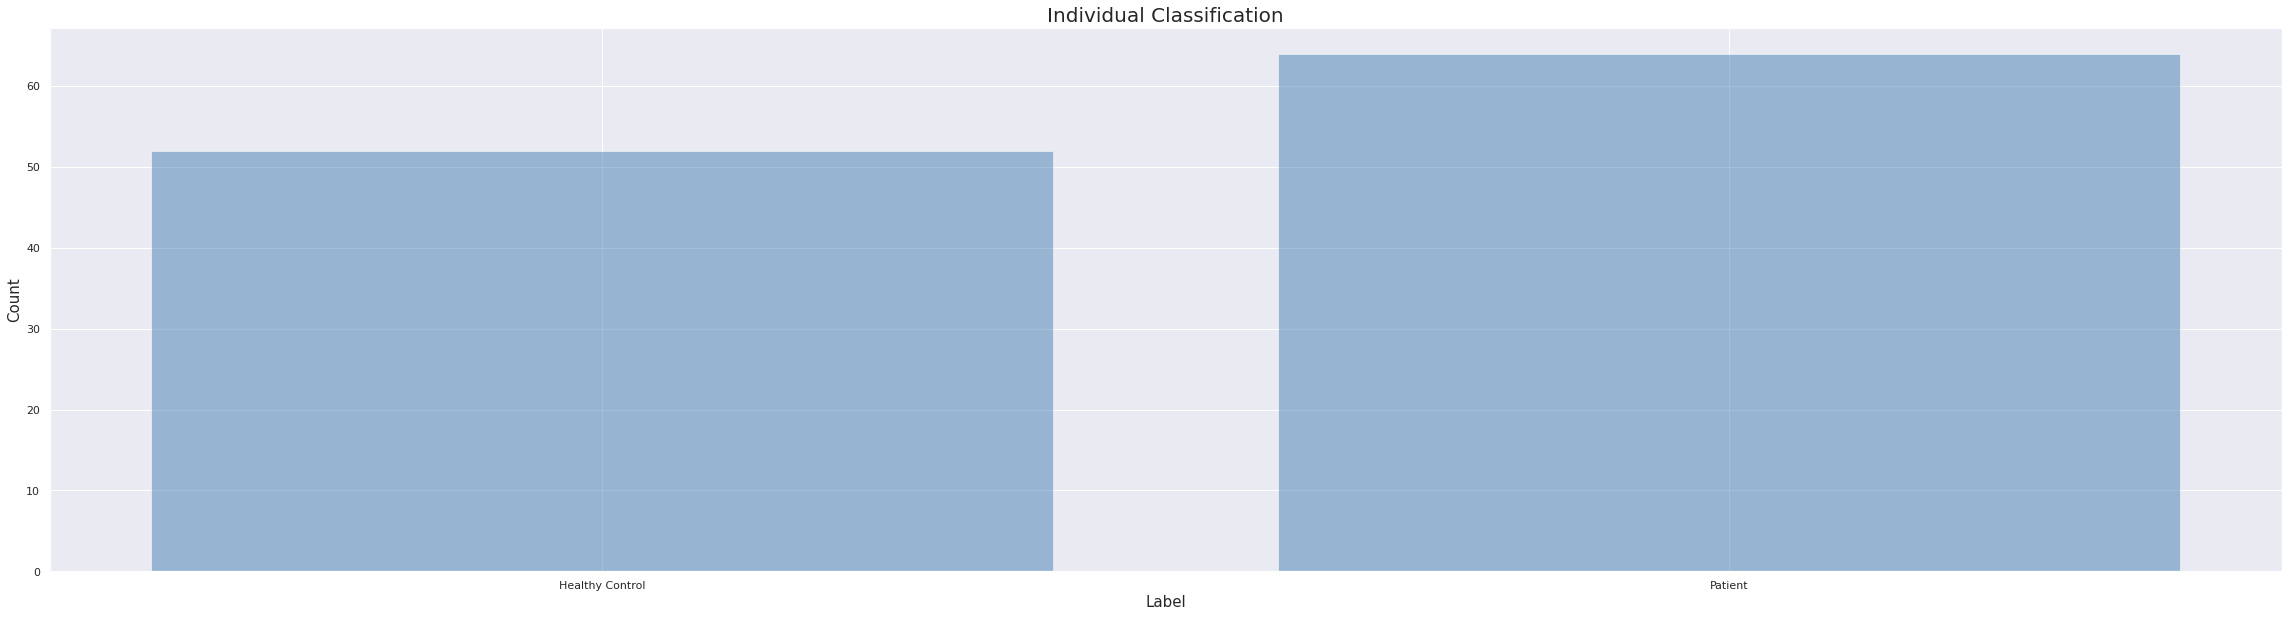

In [109]:
plot_bar(df, 'Classification', ['Healthy Control', 'Patient'], 'Individual Classification', 'Label', 'Count')

TODO

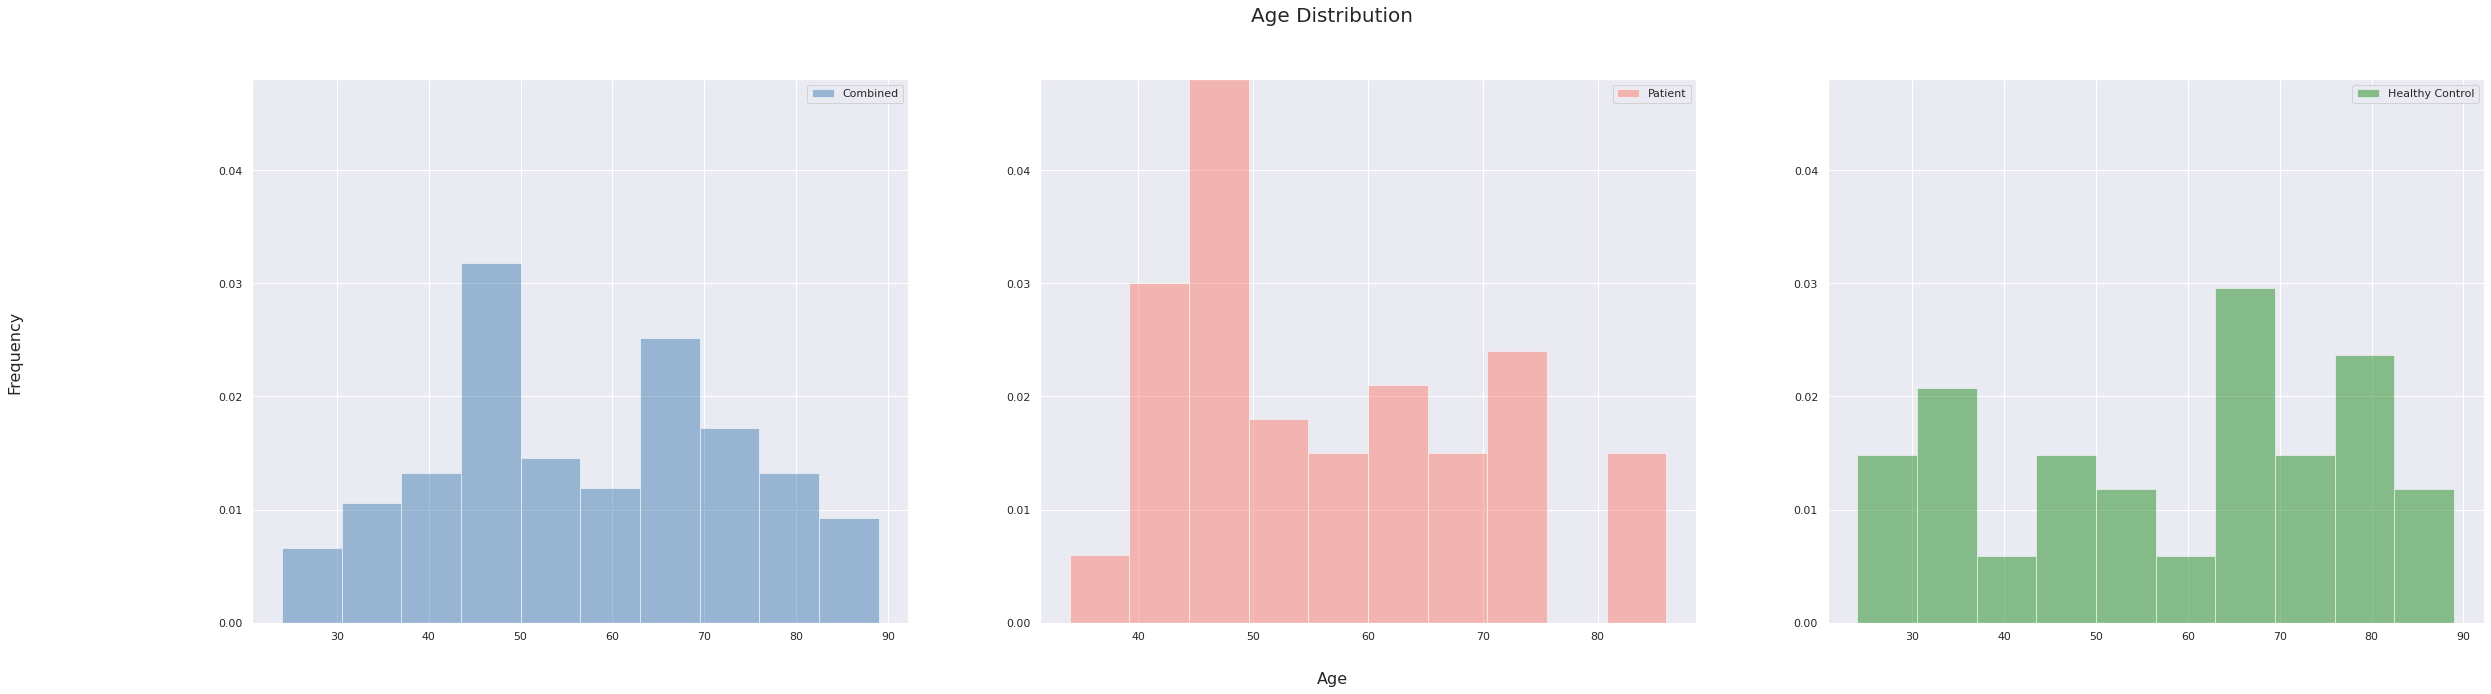

In [113]:
column = 'Age'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

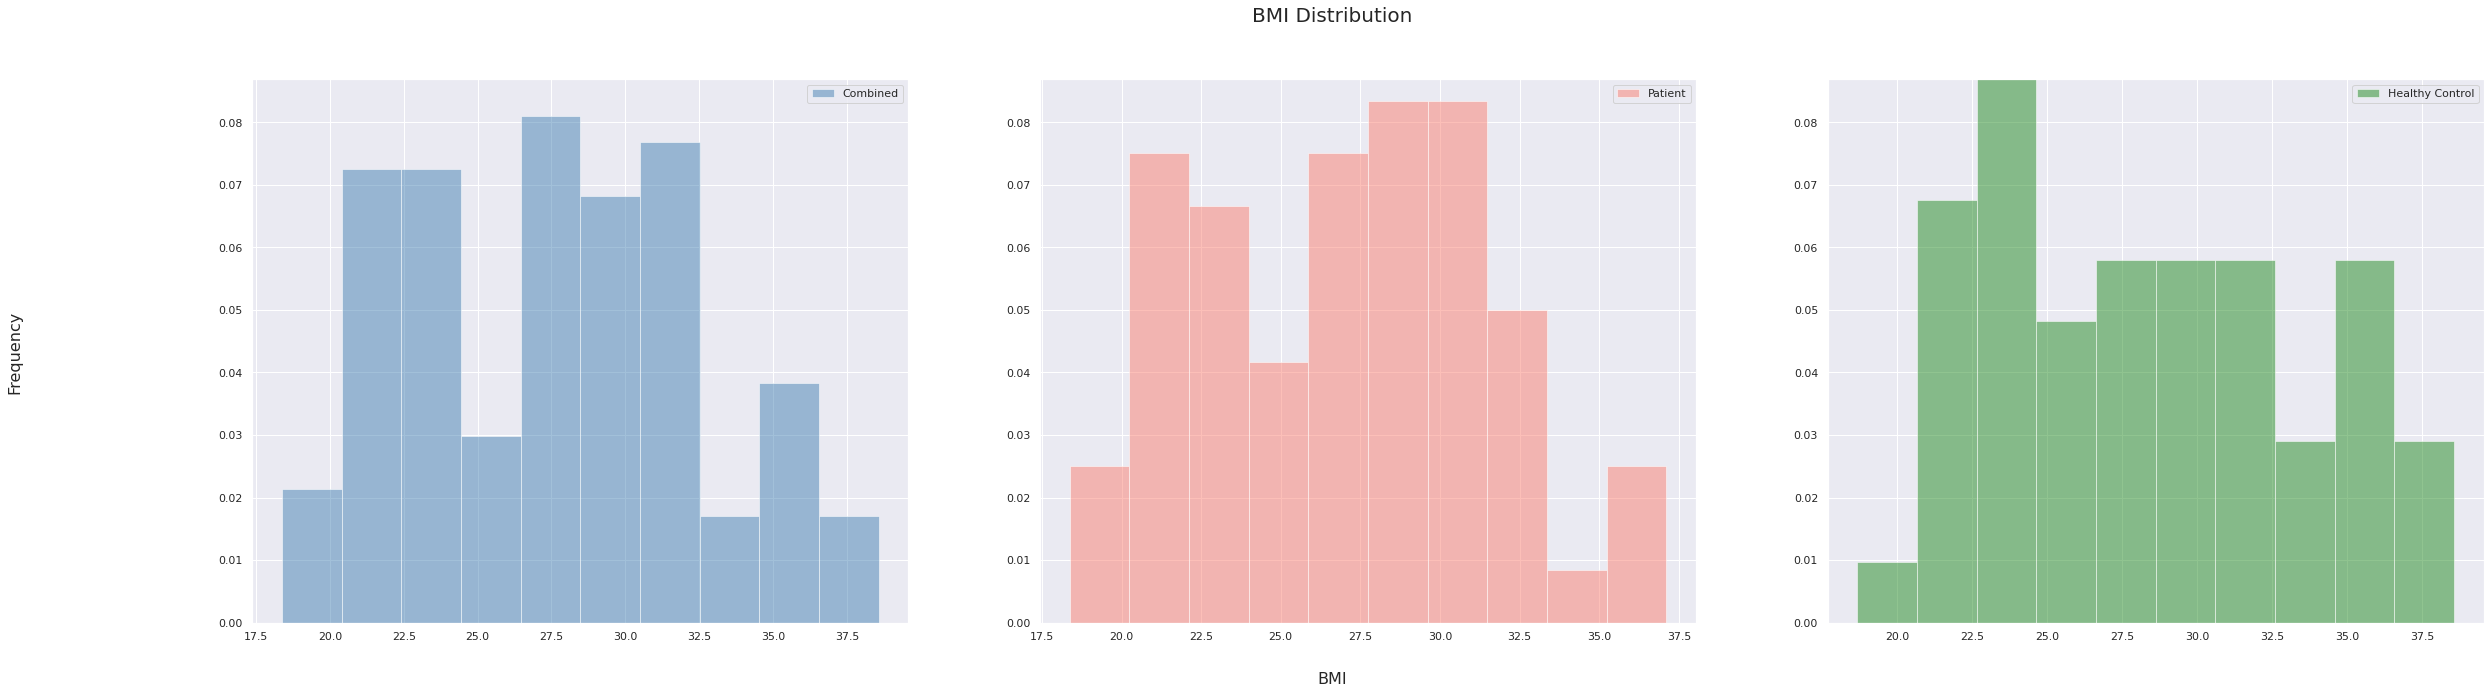

In [114]:
column = 'BMI'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

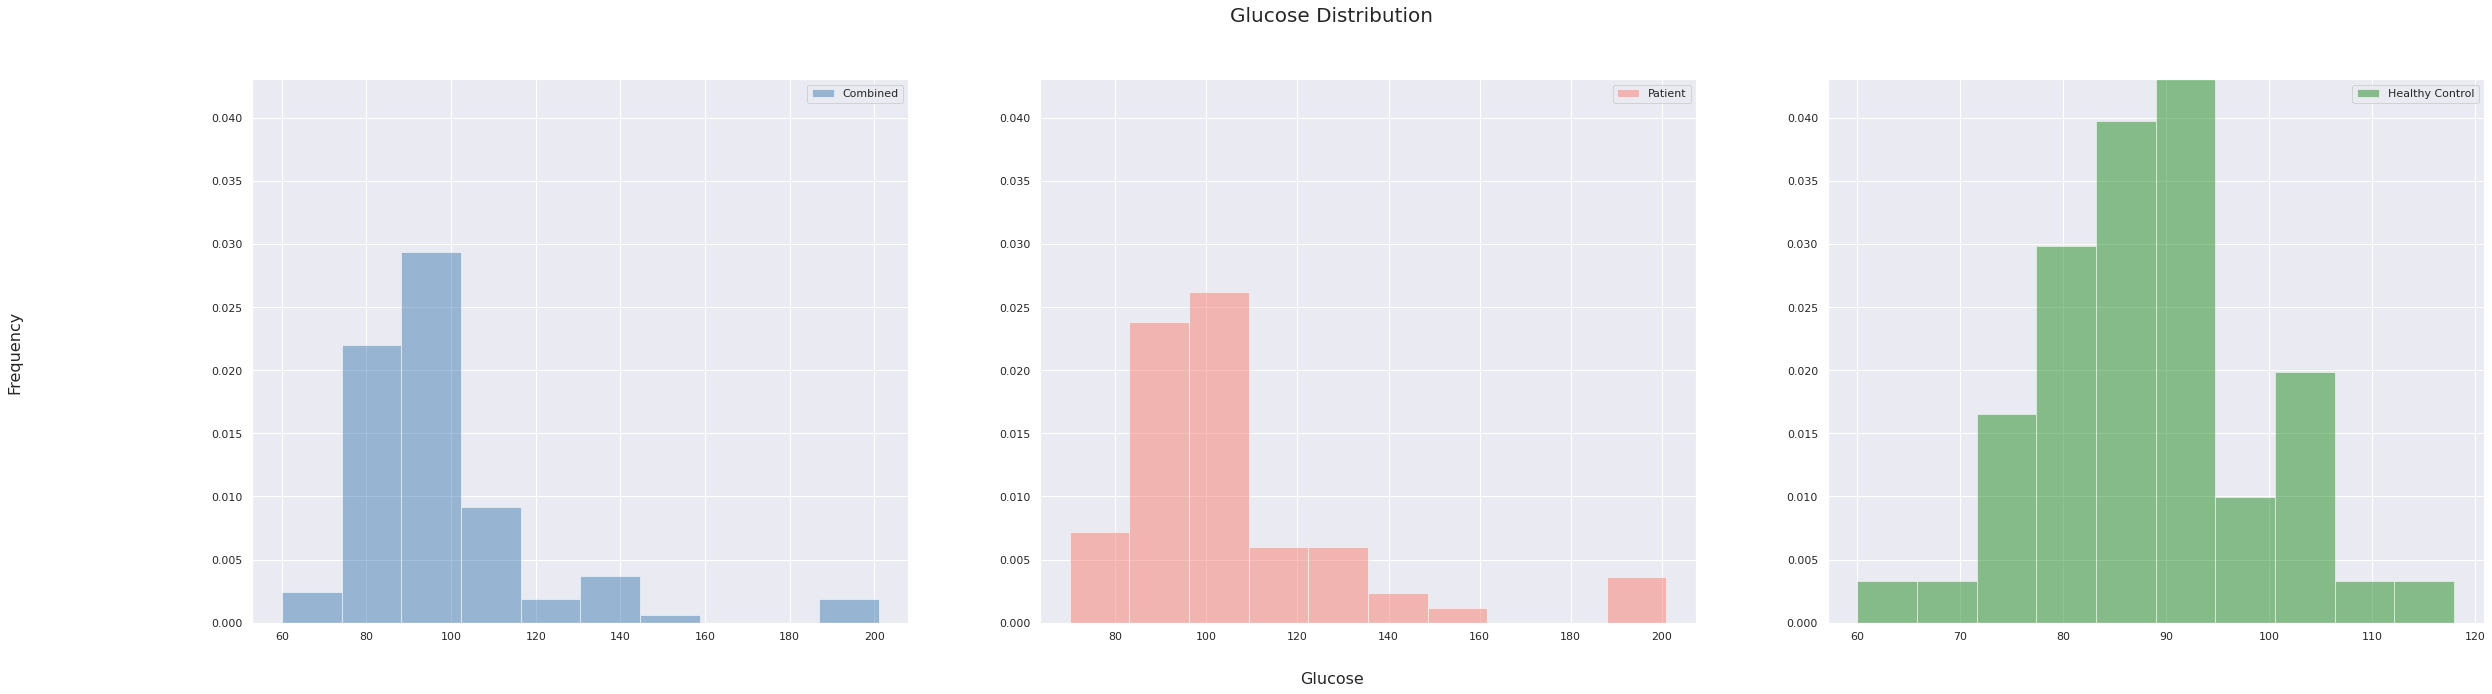

In [115]:
column = 'Glucose'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

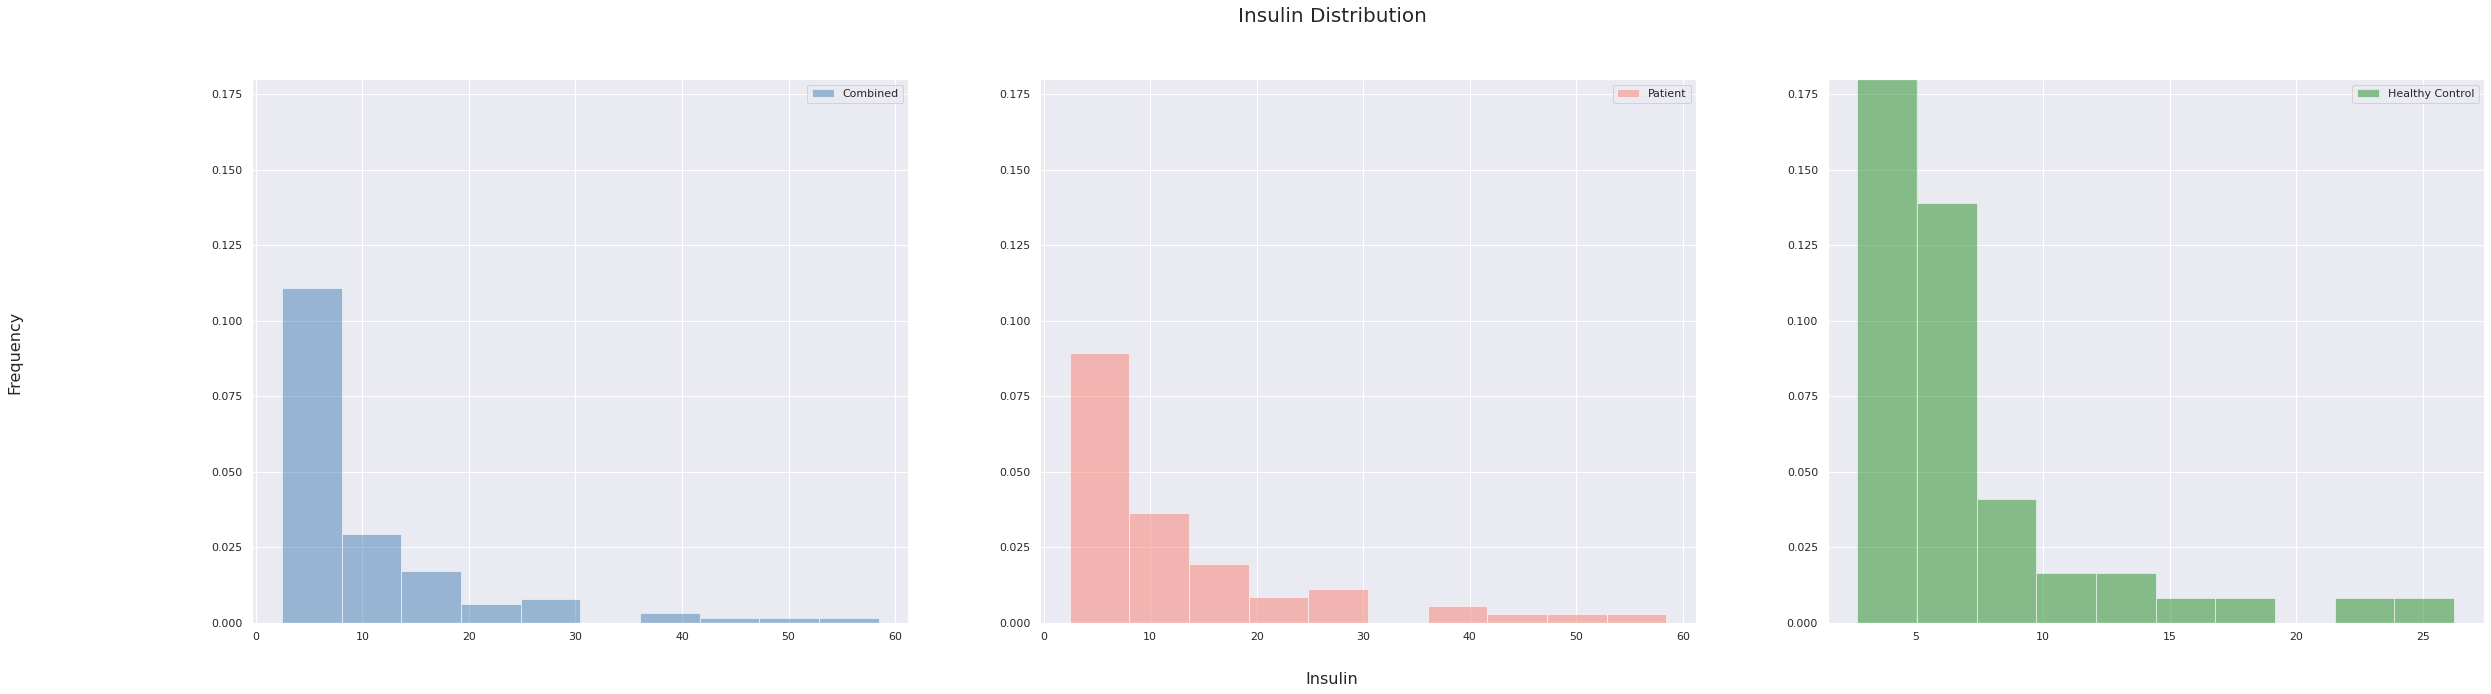

In [116]:
column = 'Insulin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

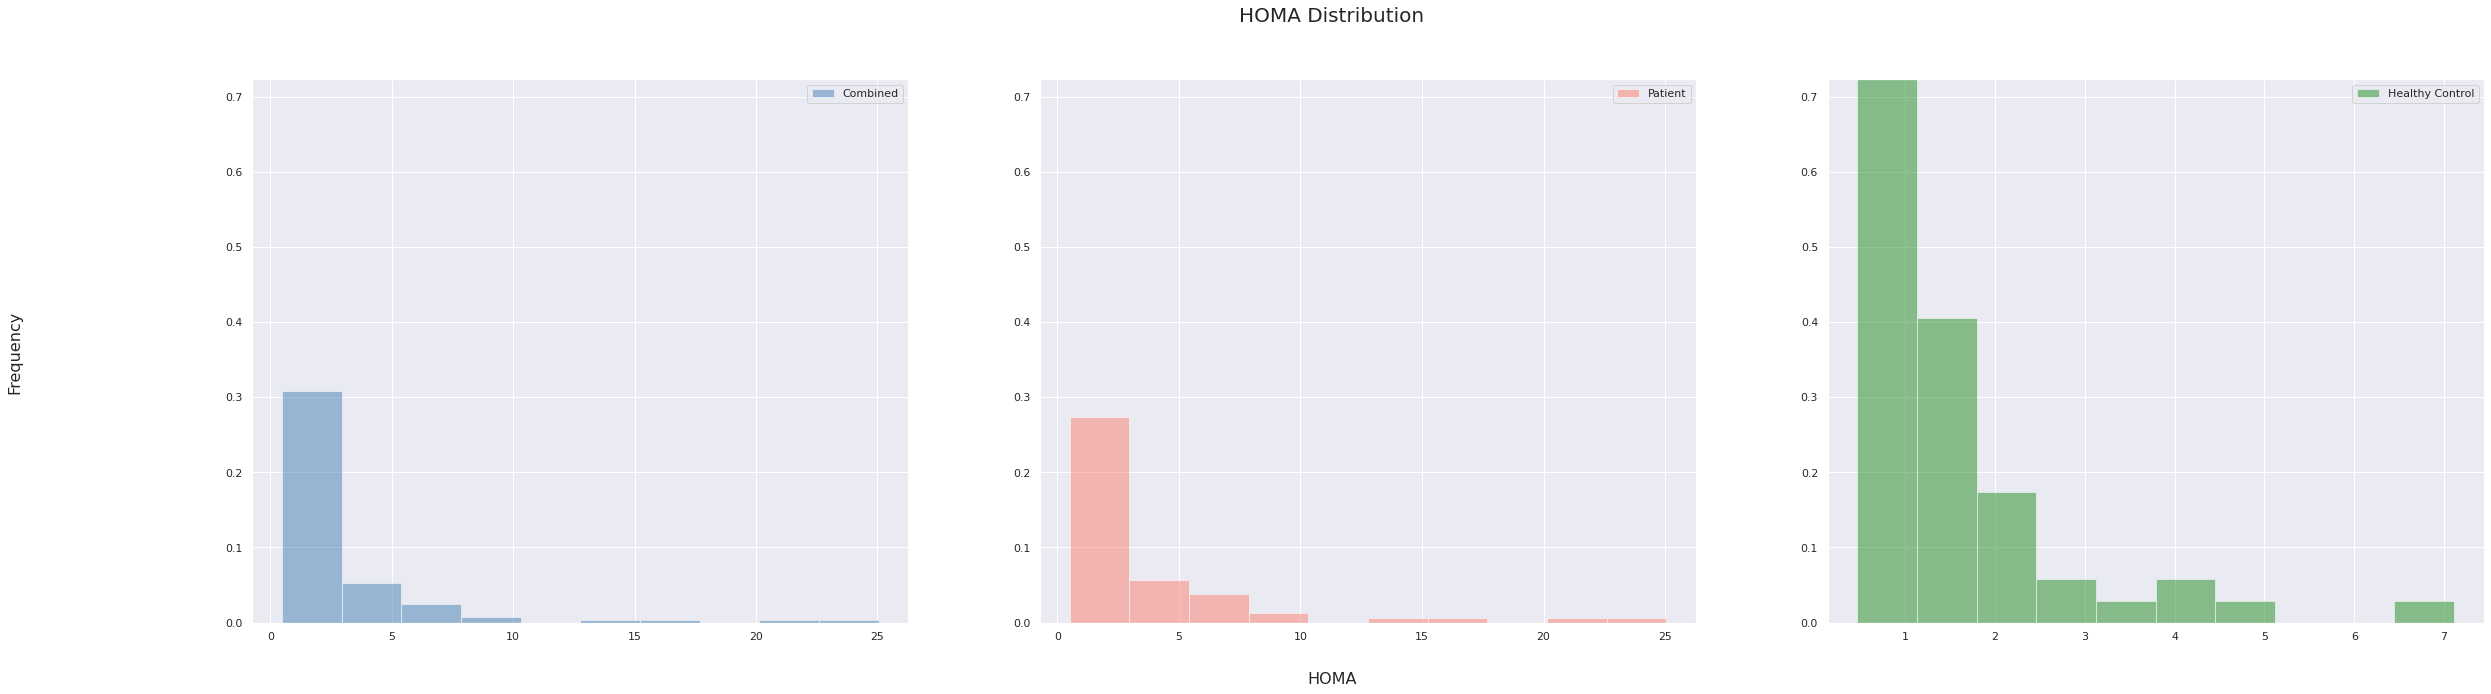

In [117]:
column = 'HOMA'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

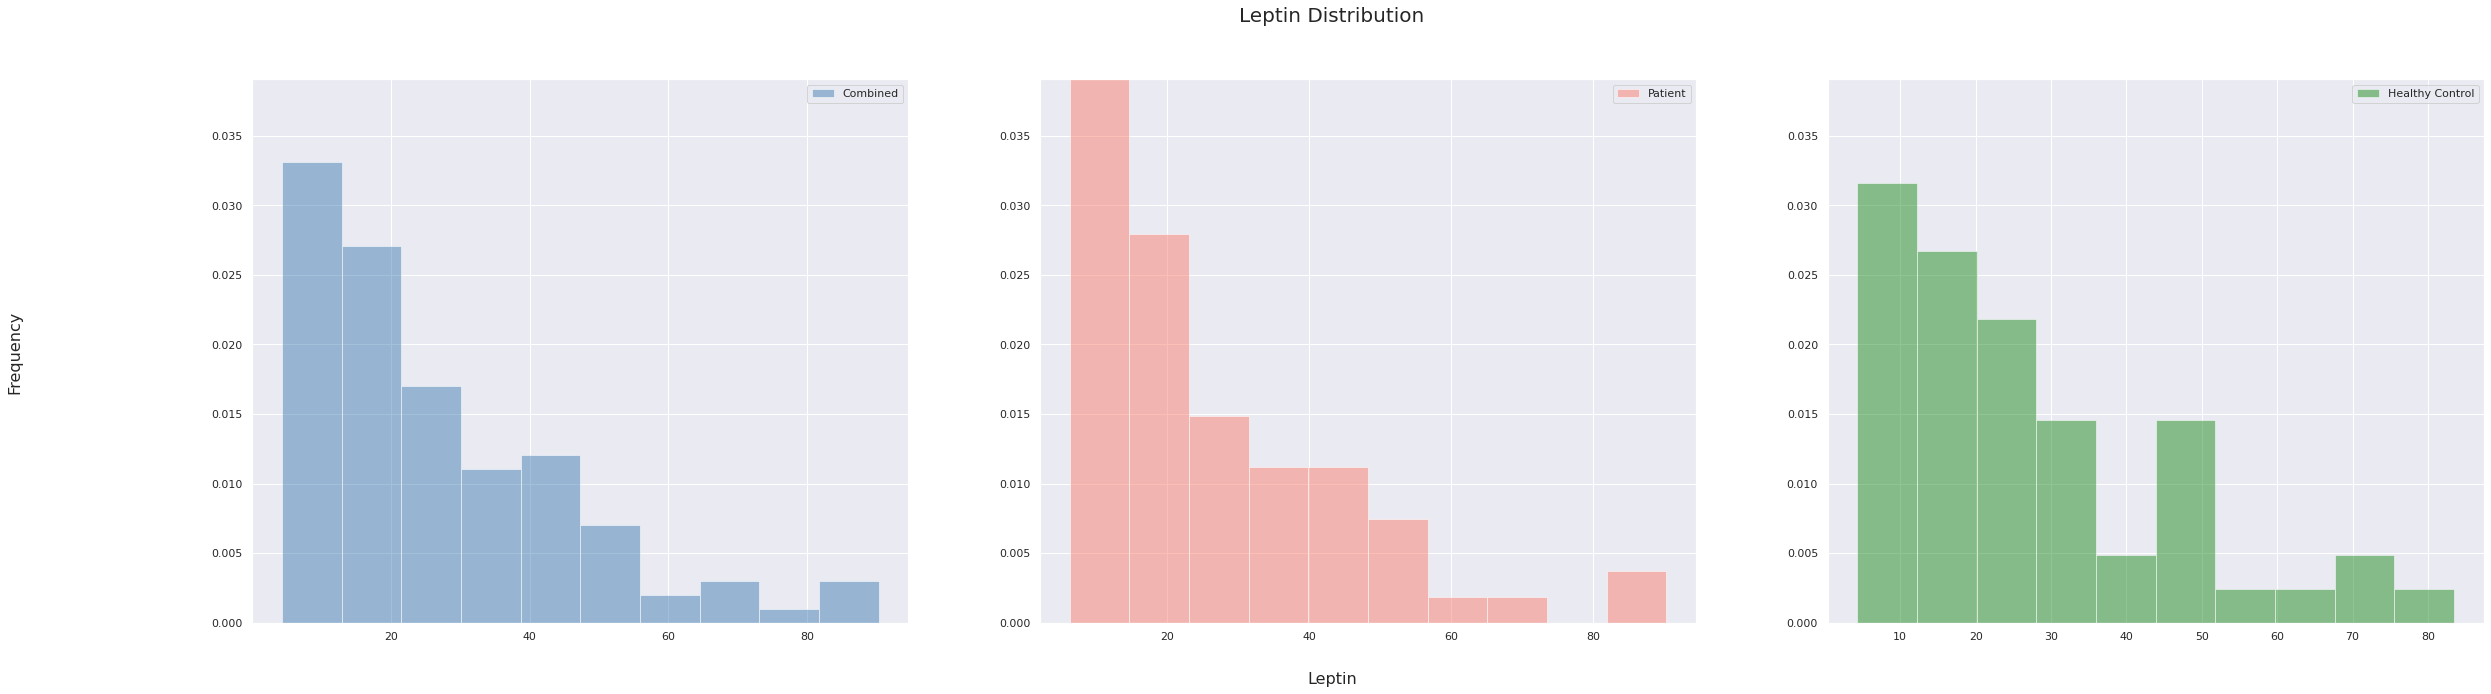

In [118]:
column = 'Leptin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

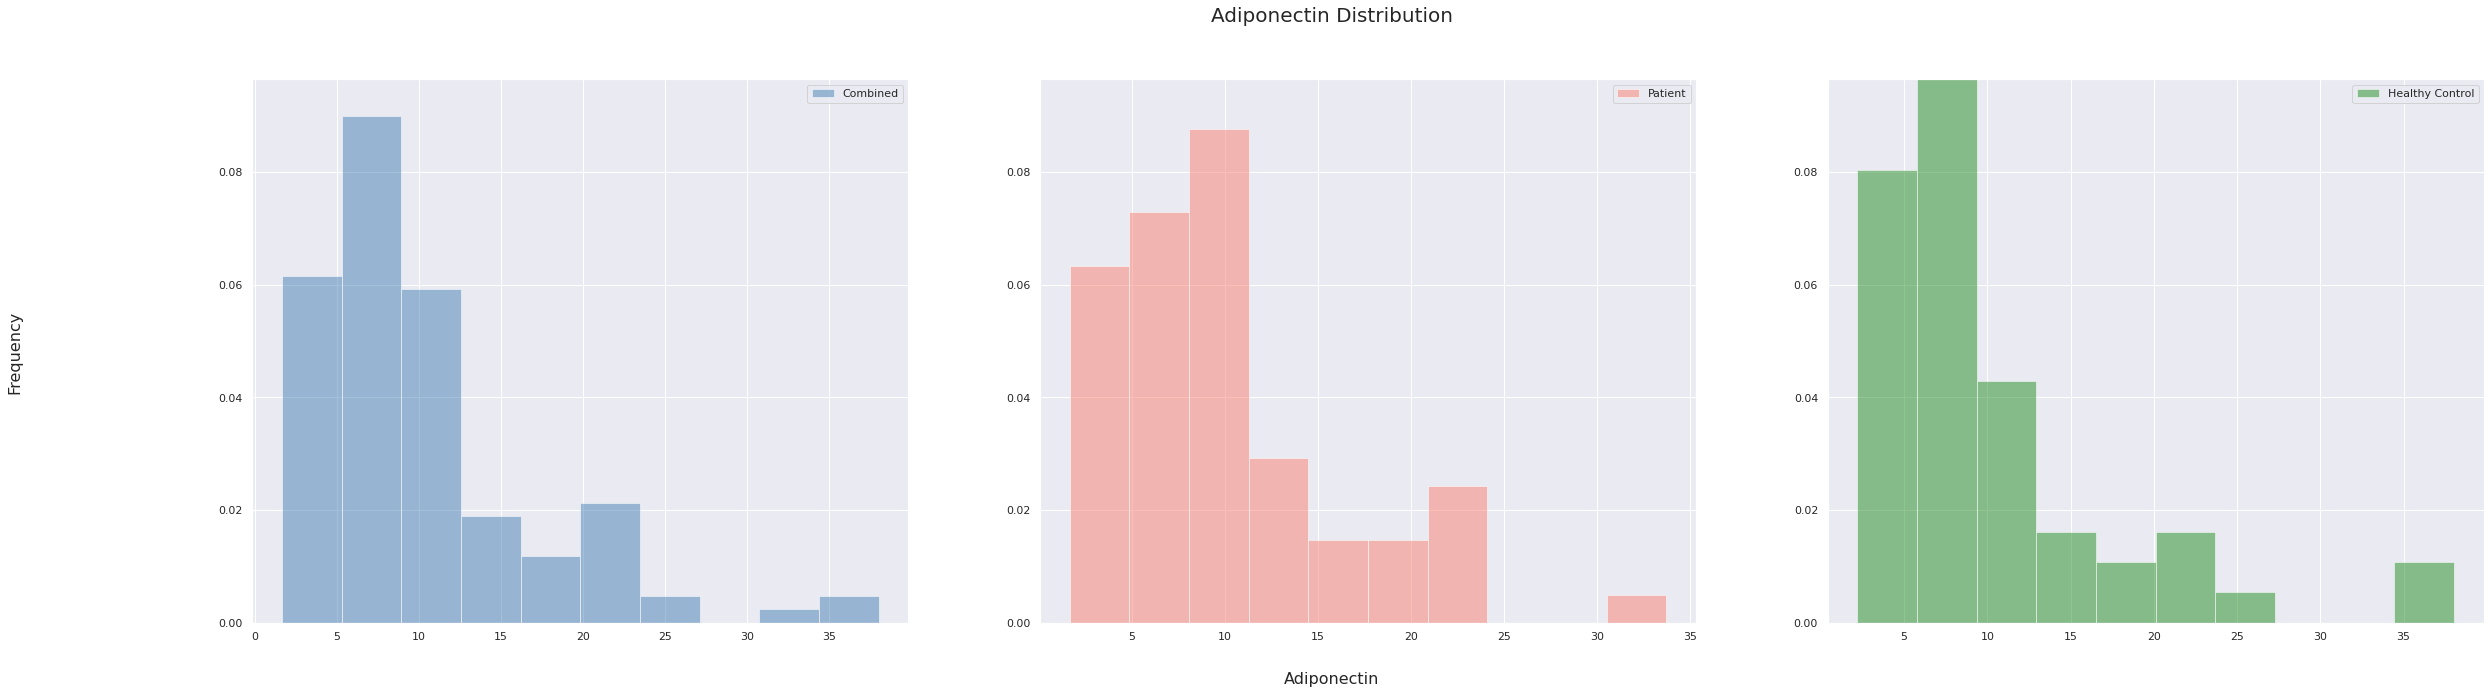

In [119]:
column = 'Adiponectin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

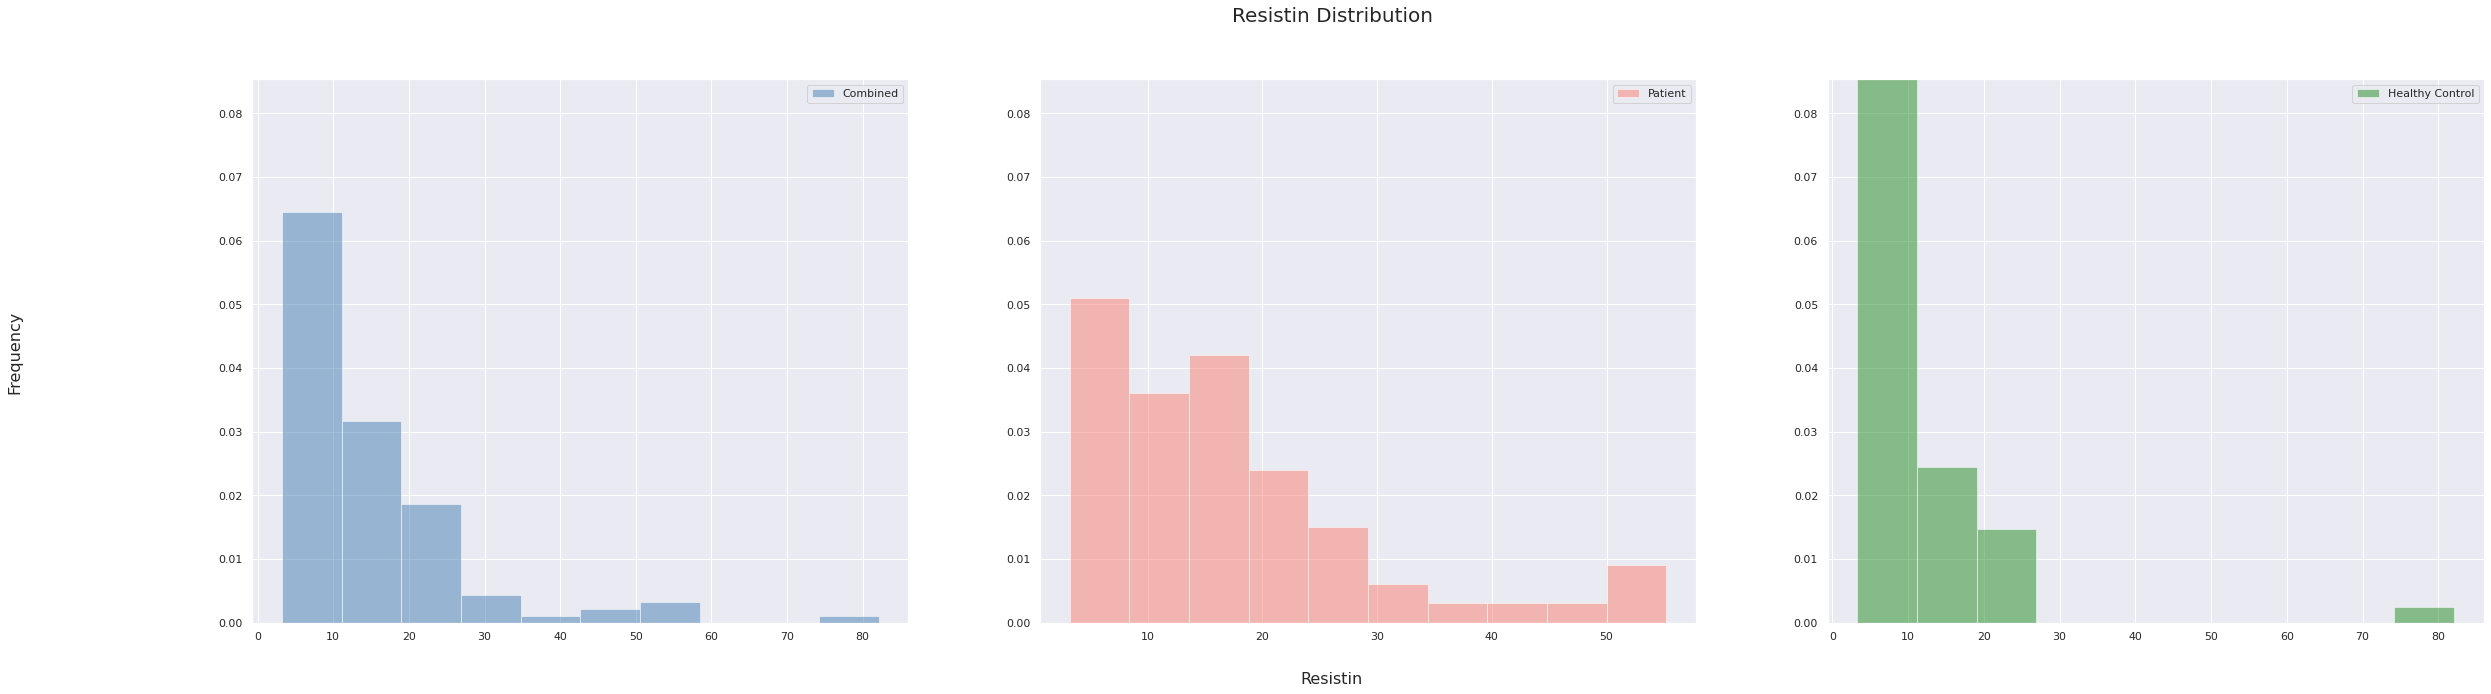

In [120]:
column = 'Resistin'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

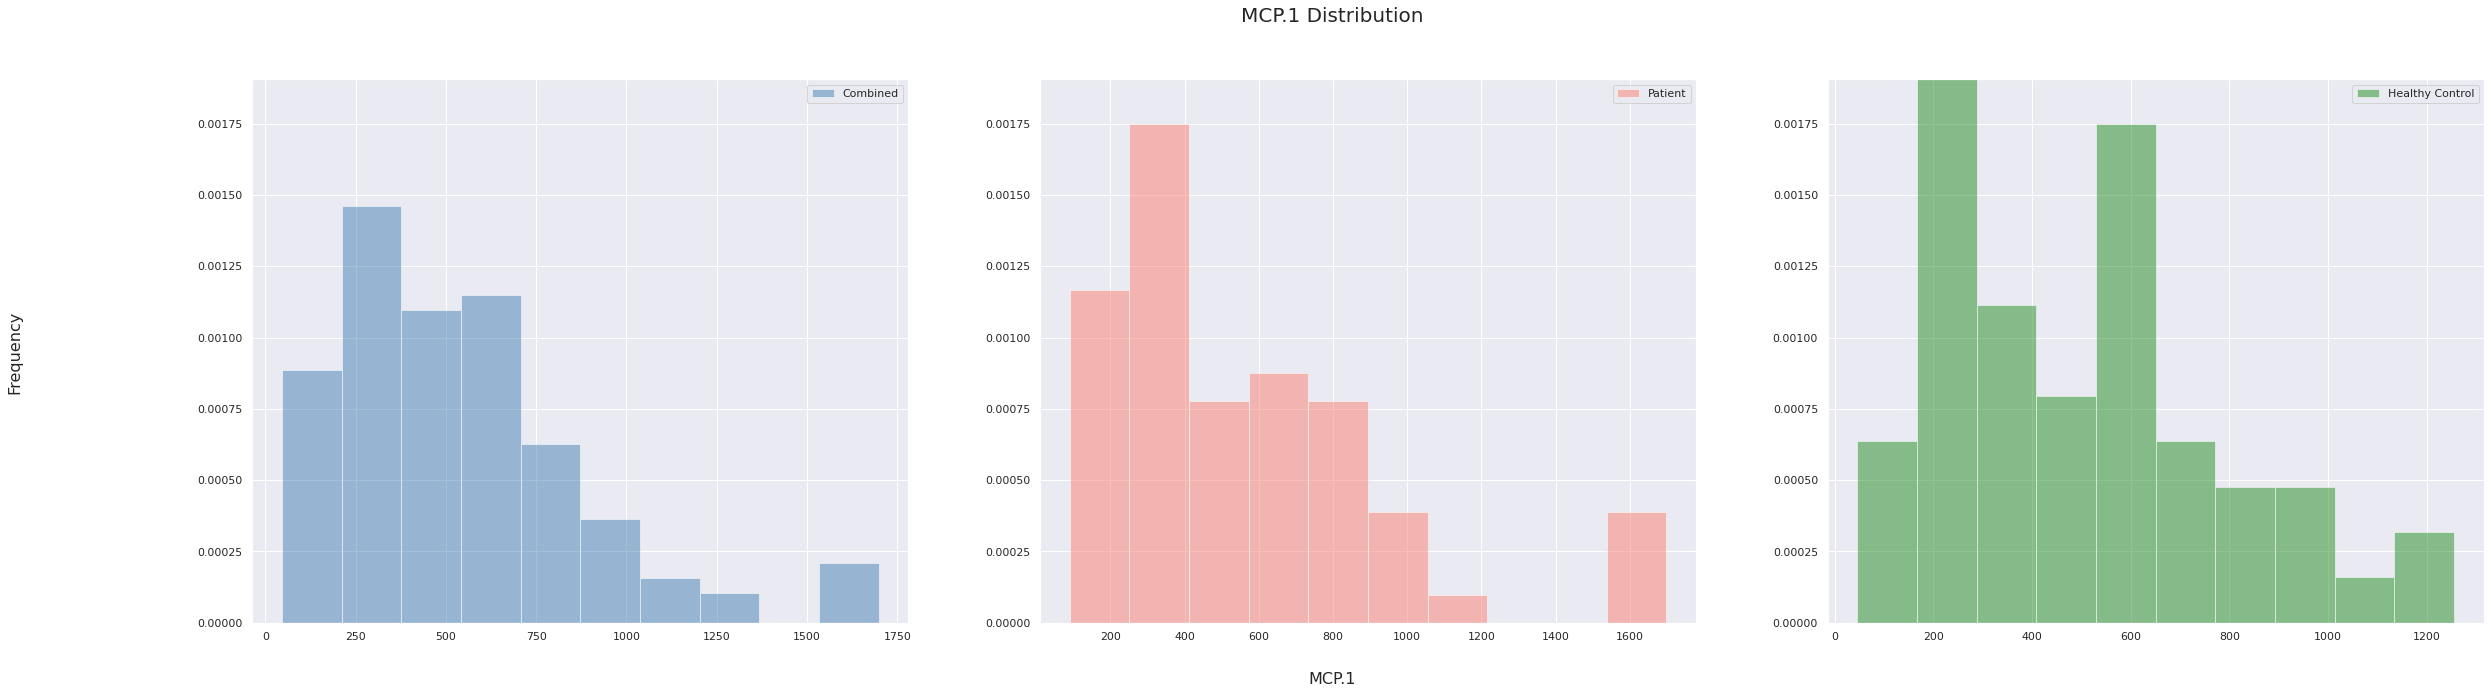

In [121]:
column = 'MCP.1'
plot_histogram(df, column, f'{column} Distribution', f'{column}', 'Frequency')

TODO

# Distribution Modeling

In [105]:
# Creates an empty, default subplot
def create_subplot(size, title, xlabel, ylabel):
    figure, ax = plt.subplots(*(1, size), figsize=(40, 10))
    return figure, ax

# Fits a Normal Distribution to data
def fit_normal_distribution(df, column, linspace, ax, ax_number):
    normal = stats.norm.pdf(linspace, *stats.norm.fit(df[column]))
    ax[ax_number].plot(linspace, normal, label='Normal')

# Fits a Gamma Distribution to data
def fit_gamma_distribution(df, column, linspace, ax, ax_number):
    gamma = stats.gamma.pdf(linspace, *stats.gamma.fit(df[column]))
    ax[ax_number].plot(linspace, gamma, label='Gamma')

# Fits a Beta Distribution to data
def fit_beta_distribution(df, column, linspace, ax, ax_number):
    beta = stats.beta.pdf(linspace, *stats.beta.fit(df[column]))
    ax[ax_number].plot(linspace, beta, label='Beta')

# Plots a Histogram of given data along with a Normal, Gamma, and Beta distribution
def plot_histogram_distribution(df, column, title='', xlabel='', ylabel=''):
    figure, ax = create_subplot(3, title, xlabel, ylabel)

    total_freq, test_freq, control_freq = 0, 0, 0
    # Combined [0]
    total_freq, _, _ = ax[0].hist(df[column], density=True, alpha=0.5, label='Combined', color='steelblue')
    # Test [1]
    test_freq, _, _ = ax[1].hist(df[df['Classification'] == 1][column], density=True, alpha=0.5, label='Patient', color='salmon')
    # Control [2]
    control_freq, _, _ = ax[2].hist(df[df['Classification'] == 0][column], density=True, alpha=0.5, label='Healthy Control', color='forestgreen')

    y_upper_bound = np.max(np.concatenate((total_freq, control_freq, test_freq), axis=None))
    for i in range(3):
        ax[i].set_ylim([0, y_upper_bound])
        ax[i].legend()

    figure.suptitle(title, fontsize=20)
    figure.text(0.5, 0.04, xlabel, ha='center', fontsize=16)
    figure.text(0.04, 0.5, ylabel, va='center', rotation='vertical', fontsize=16)
    plt.show()


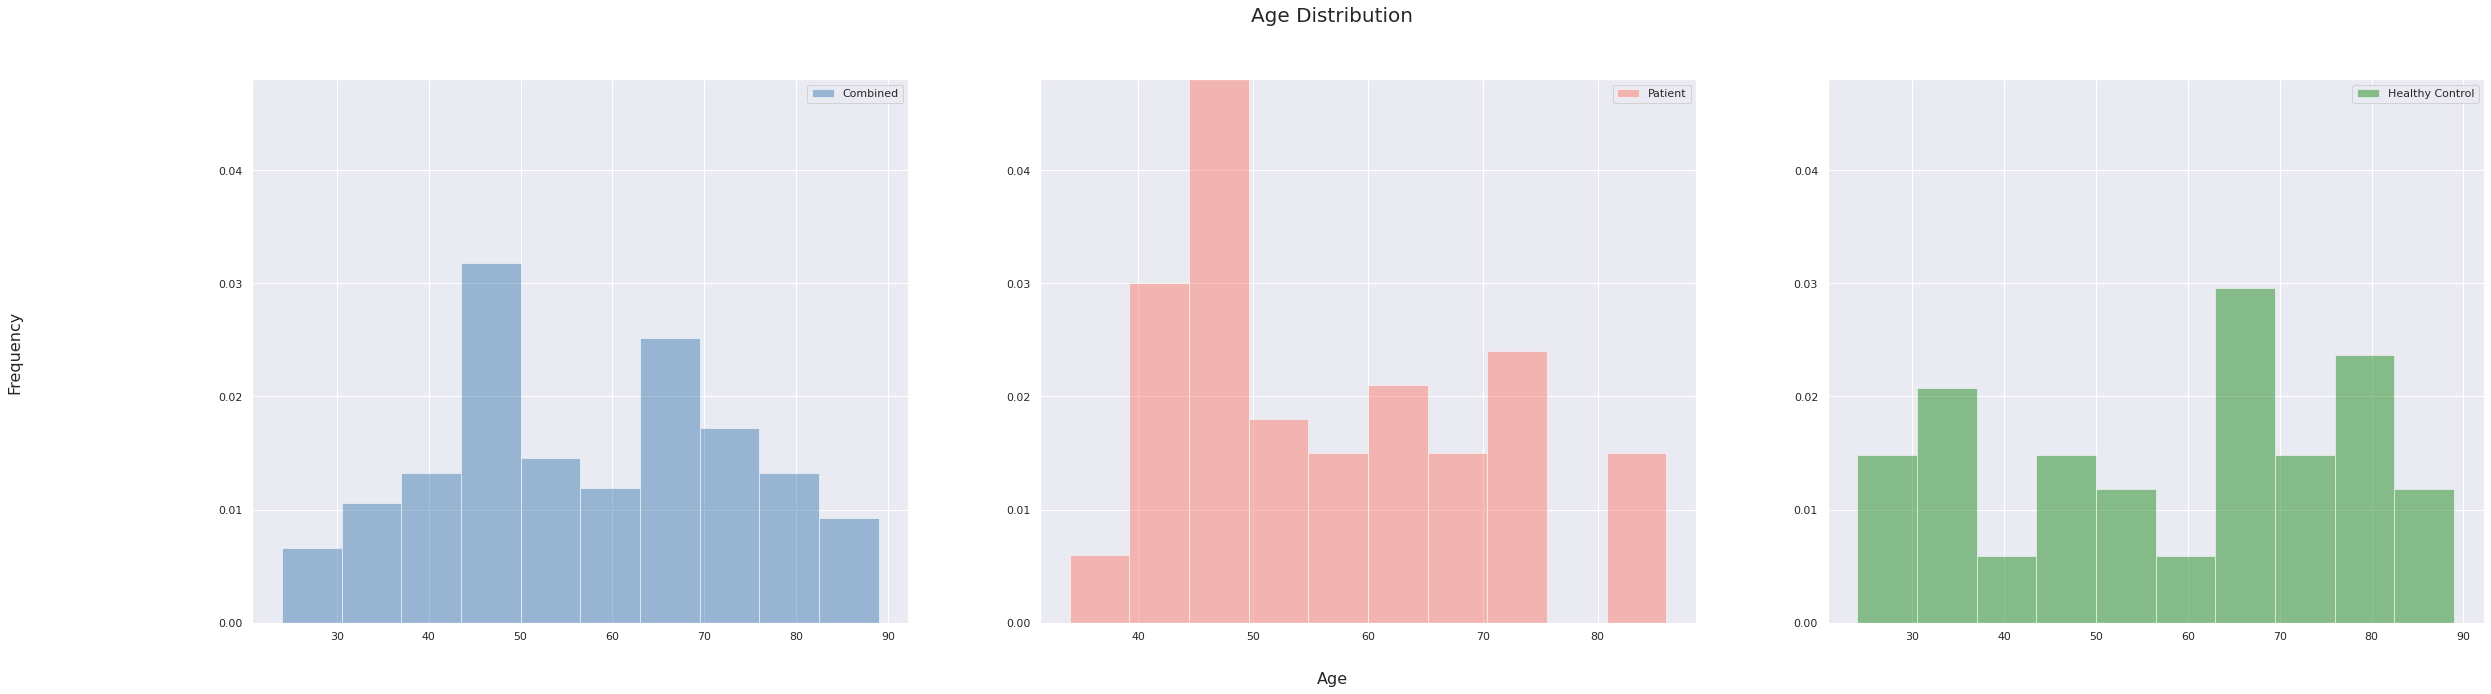

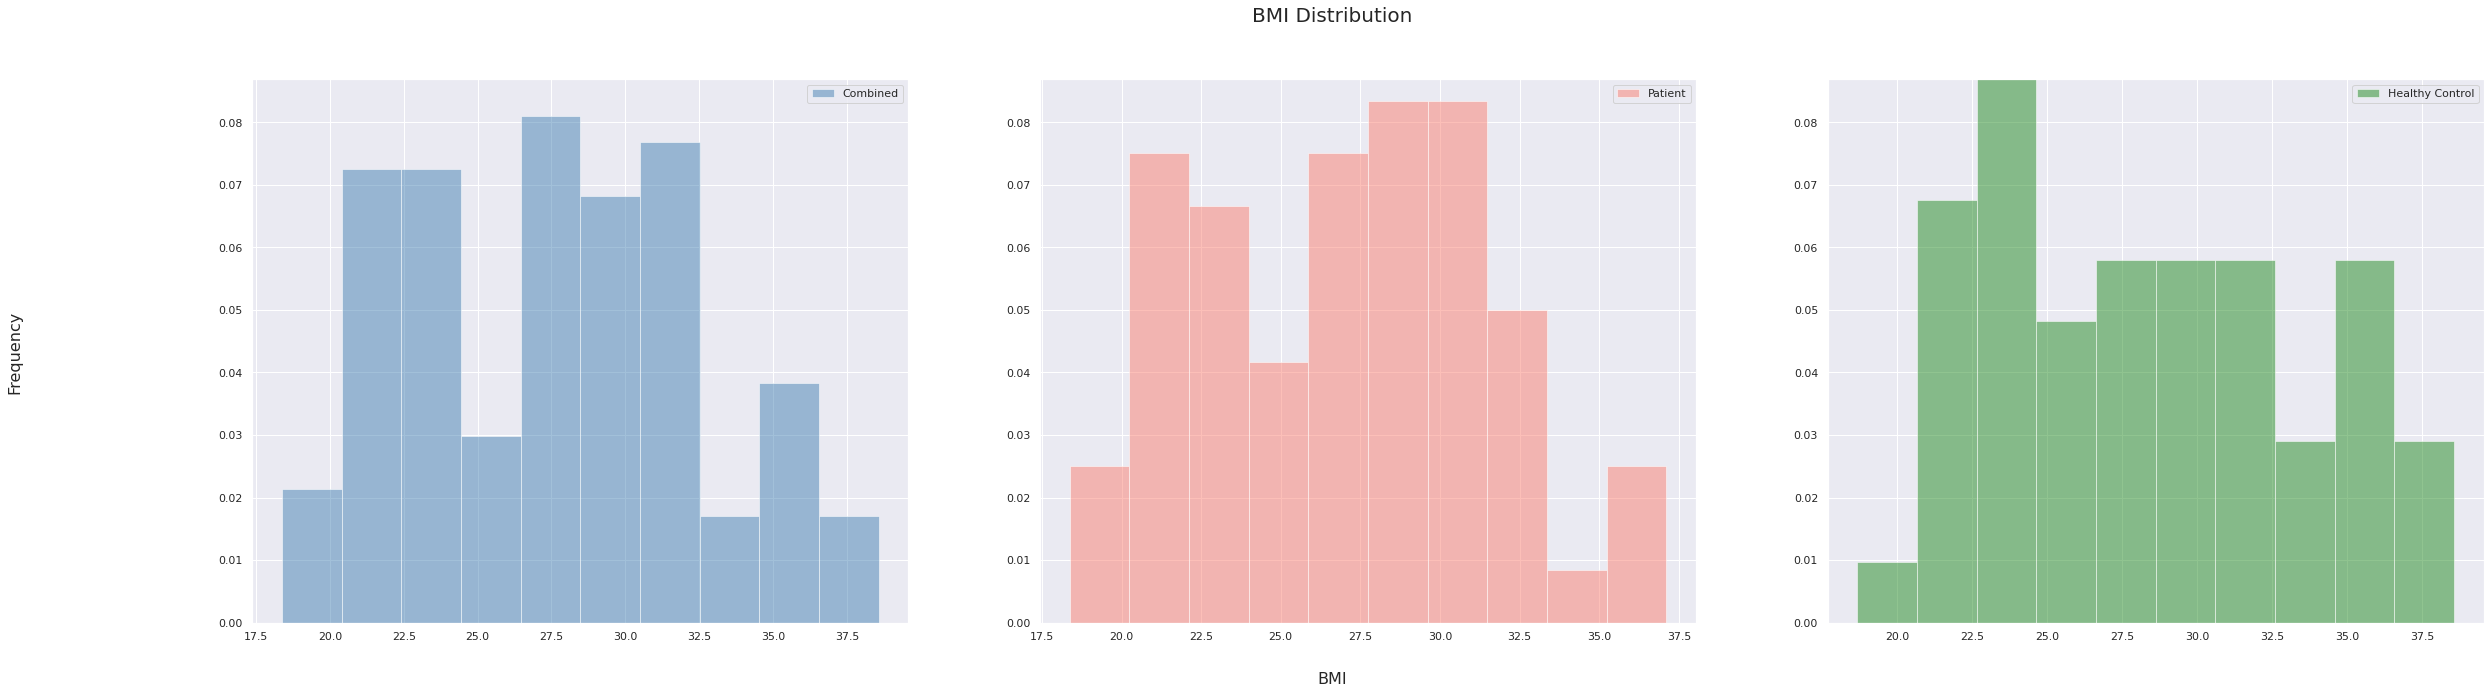

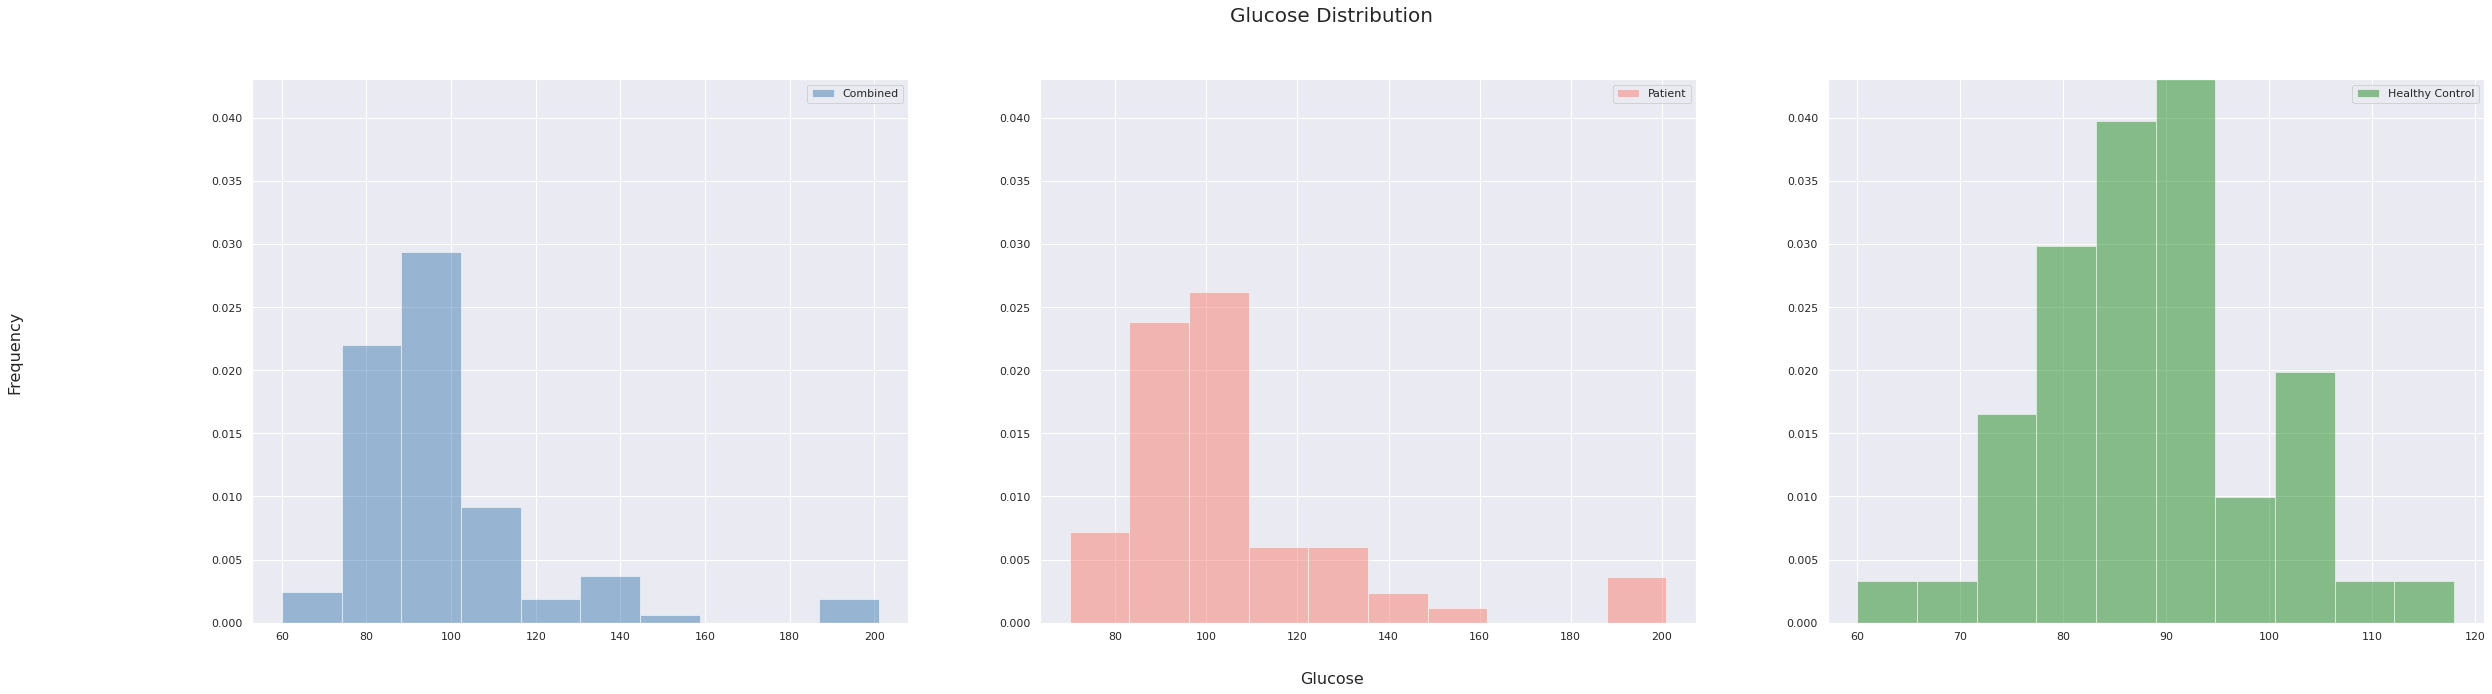

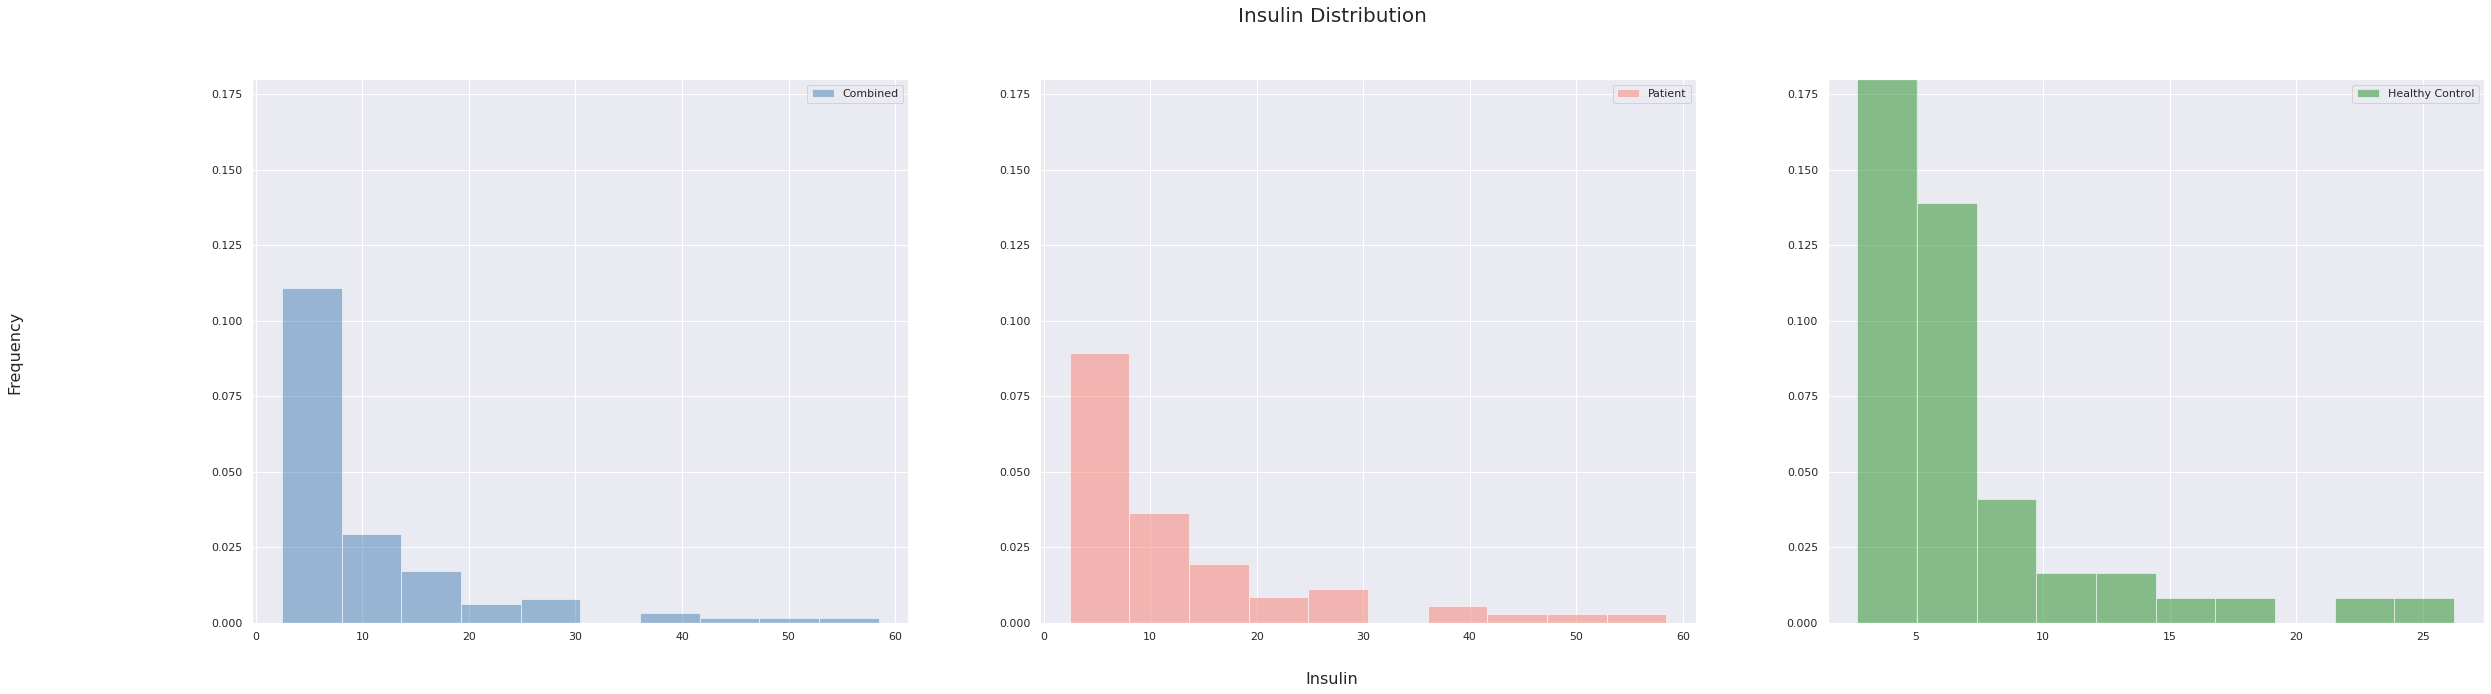

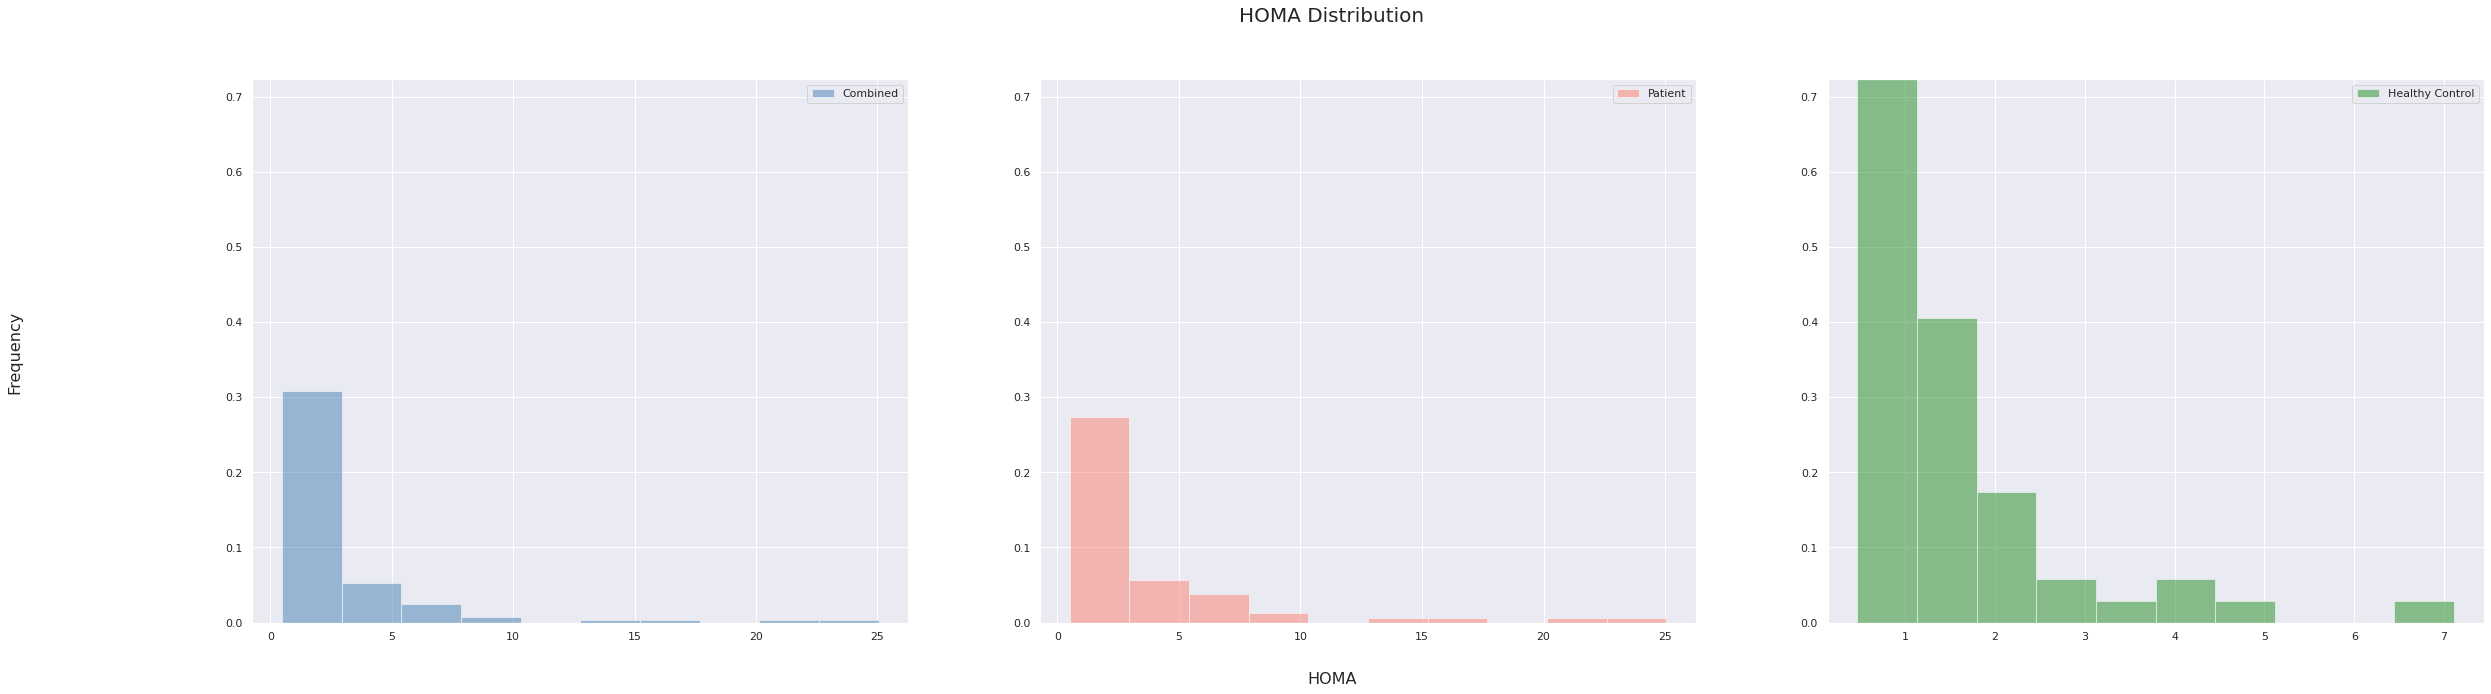

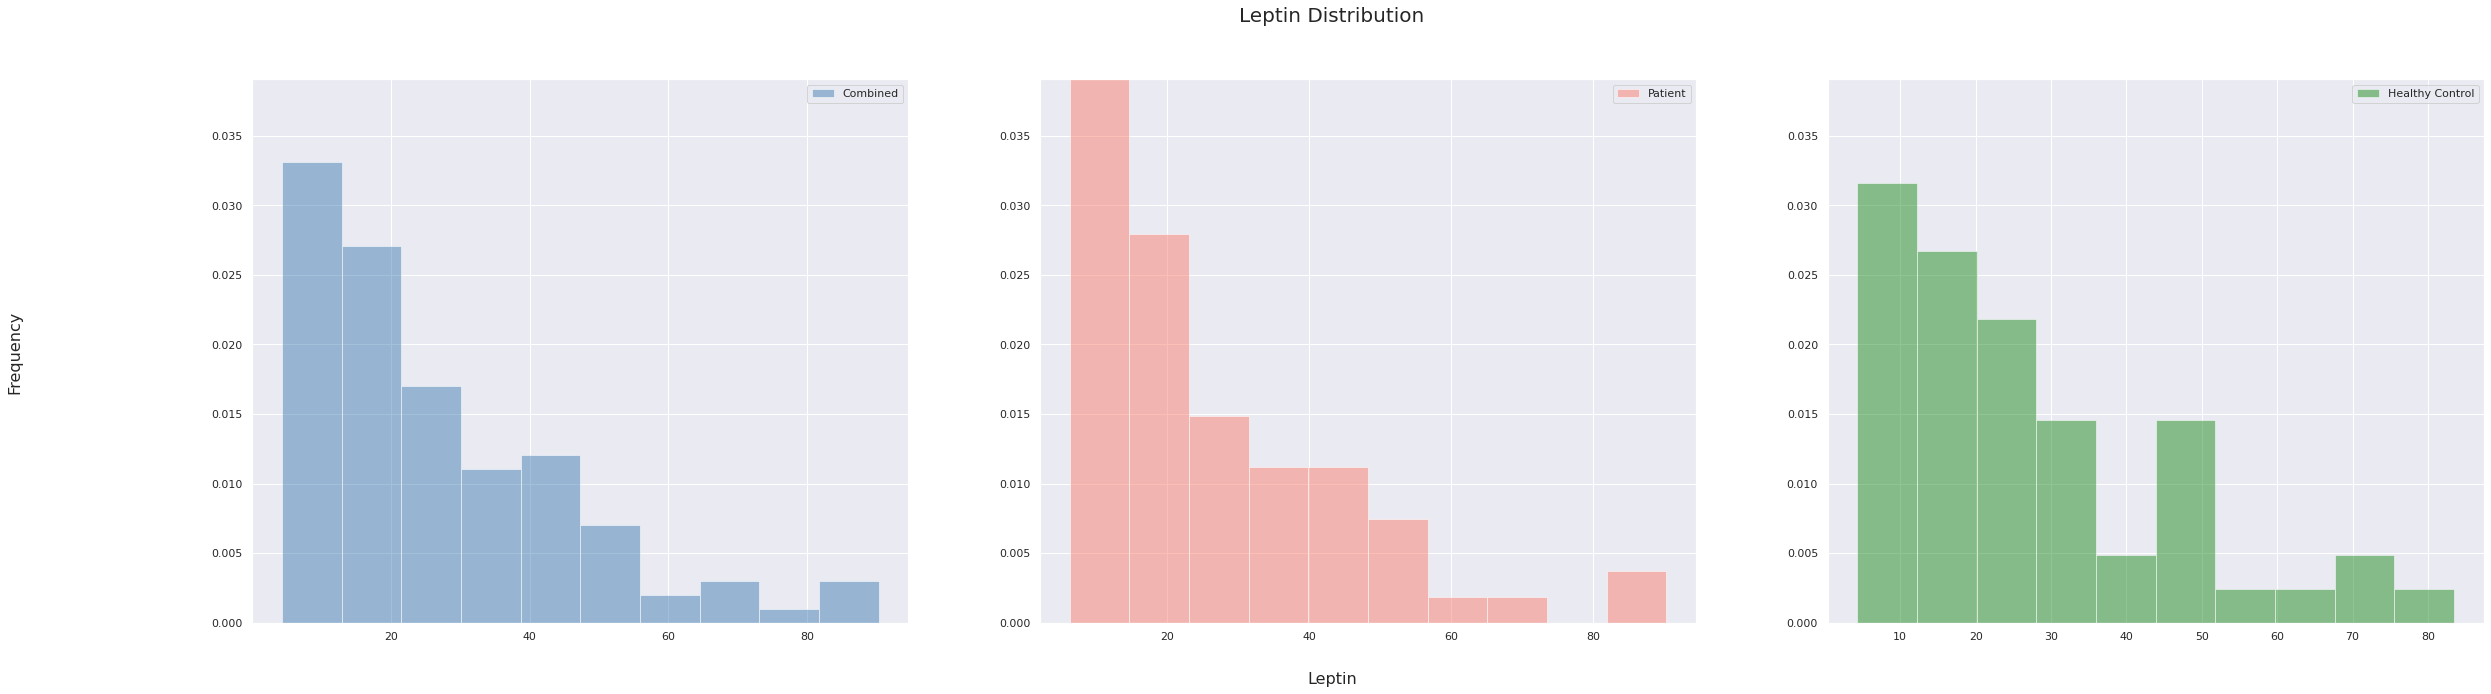

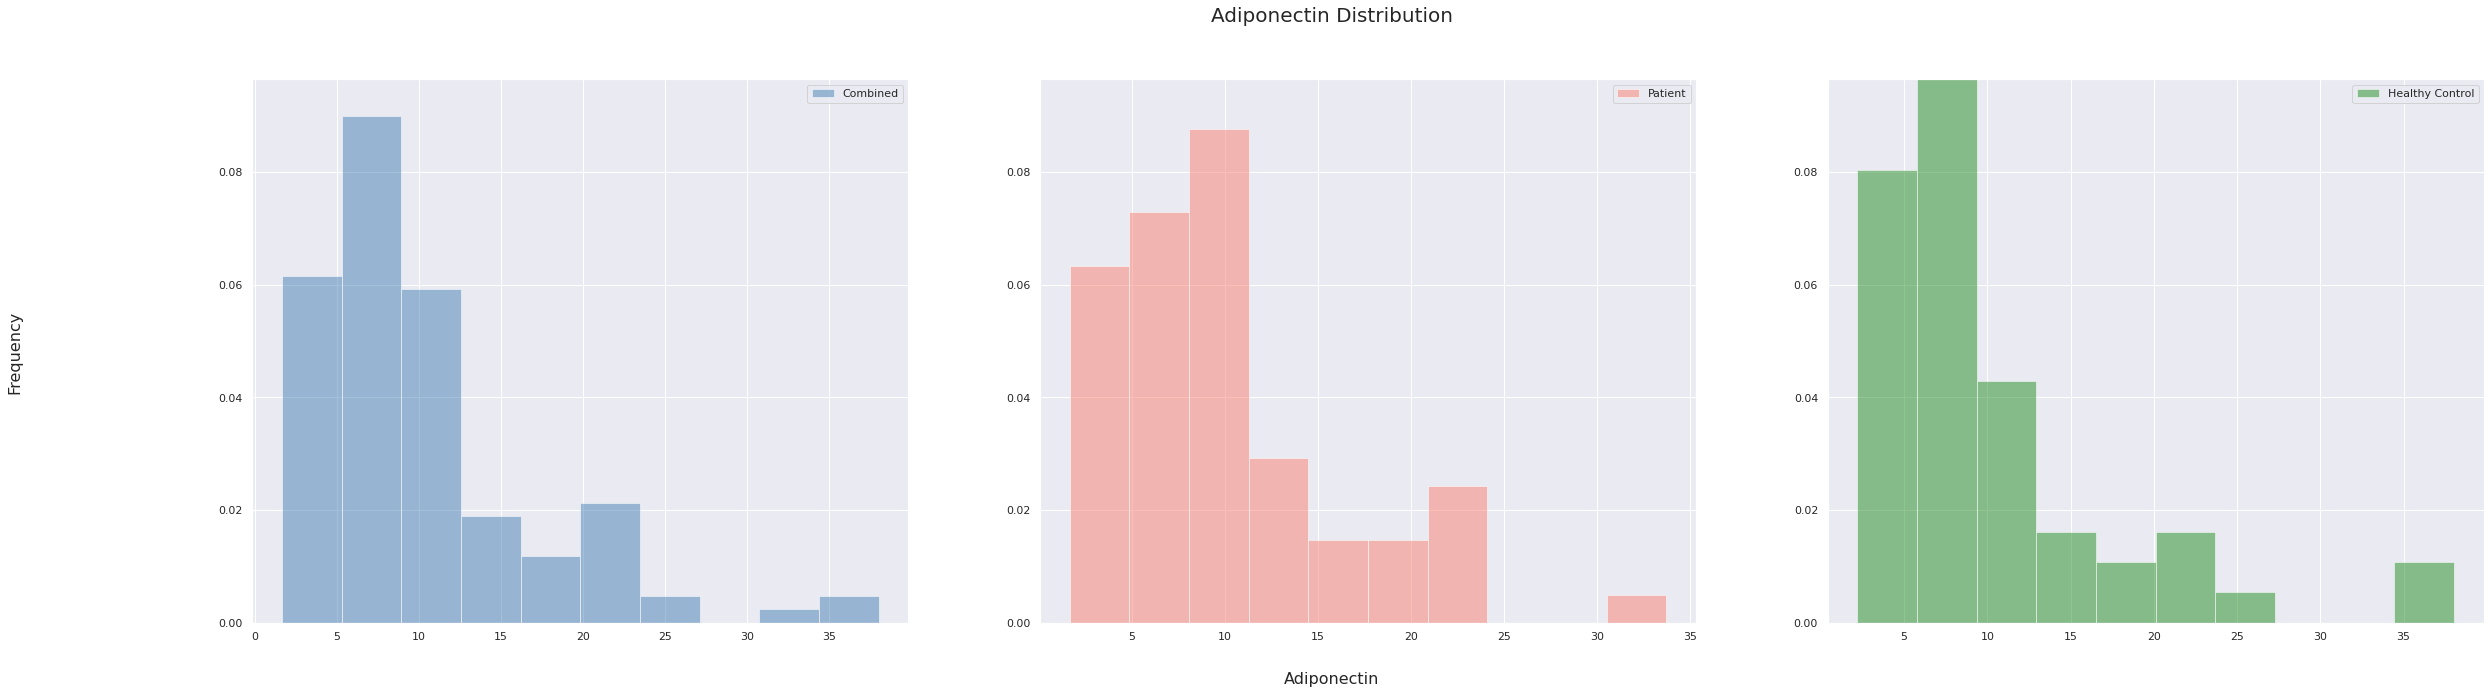

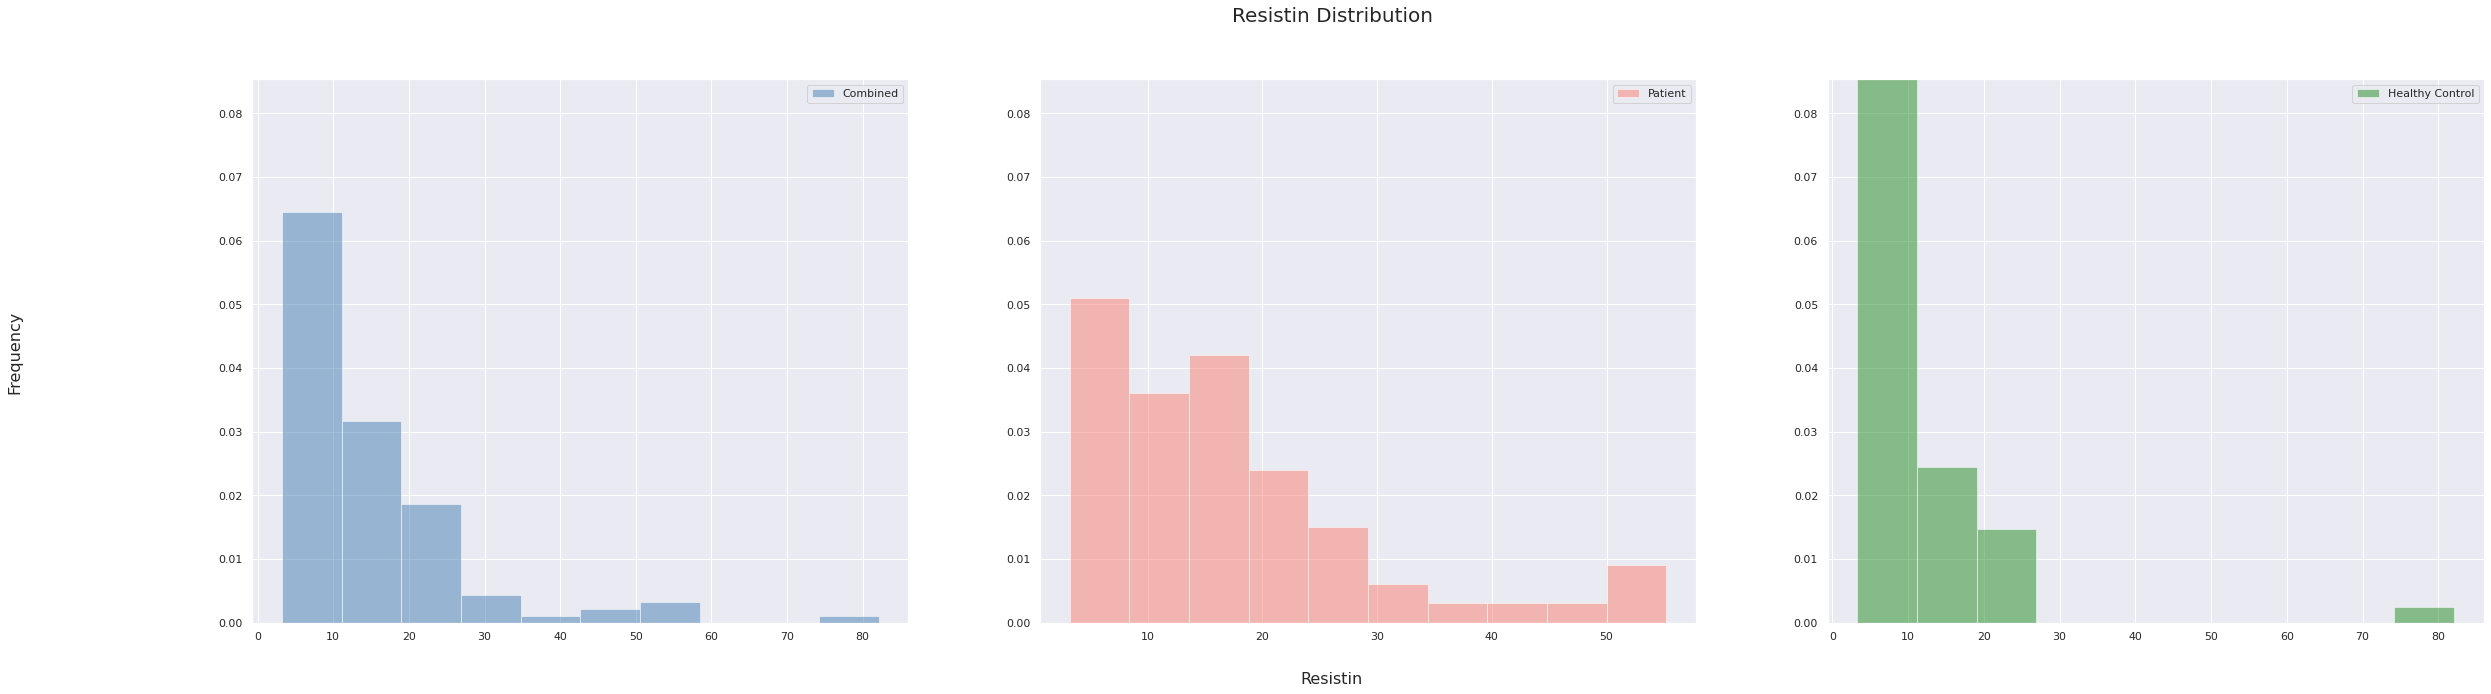

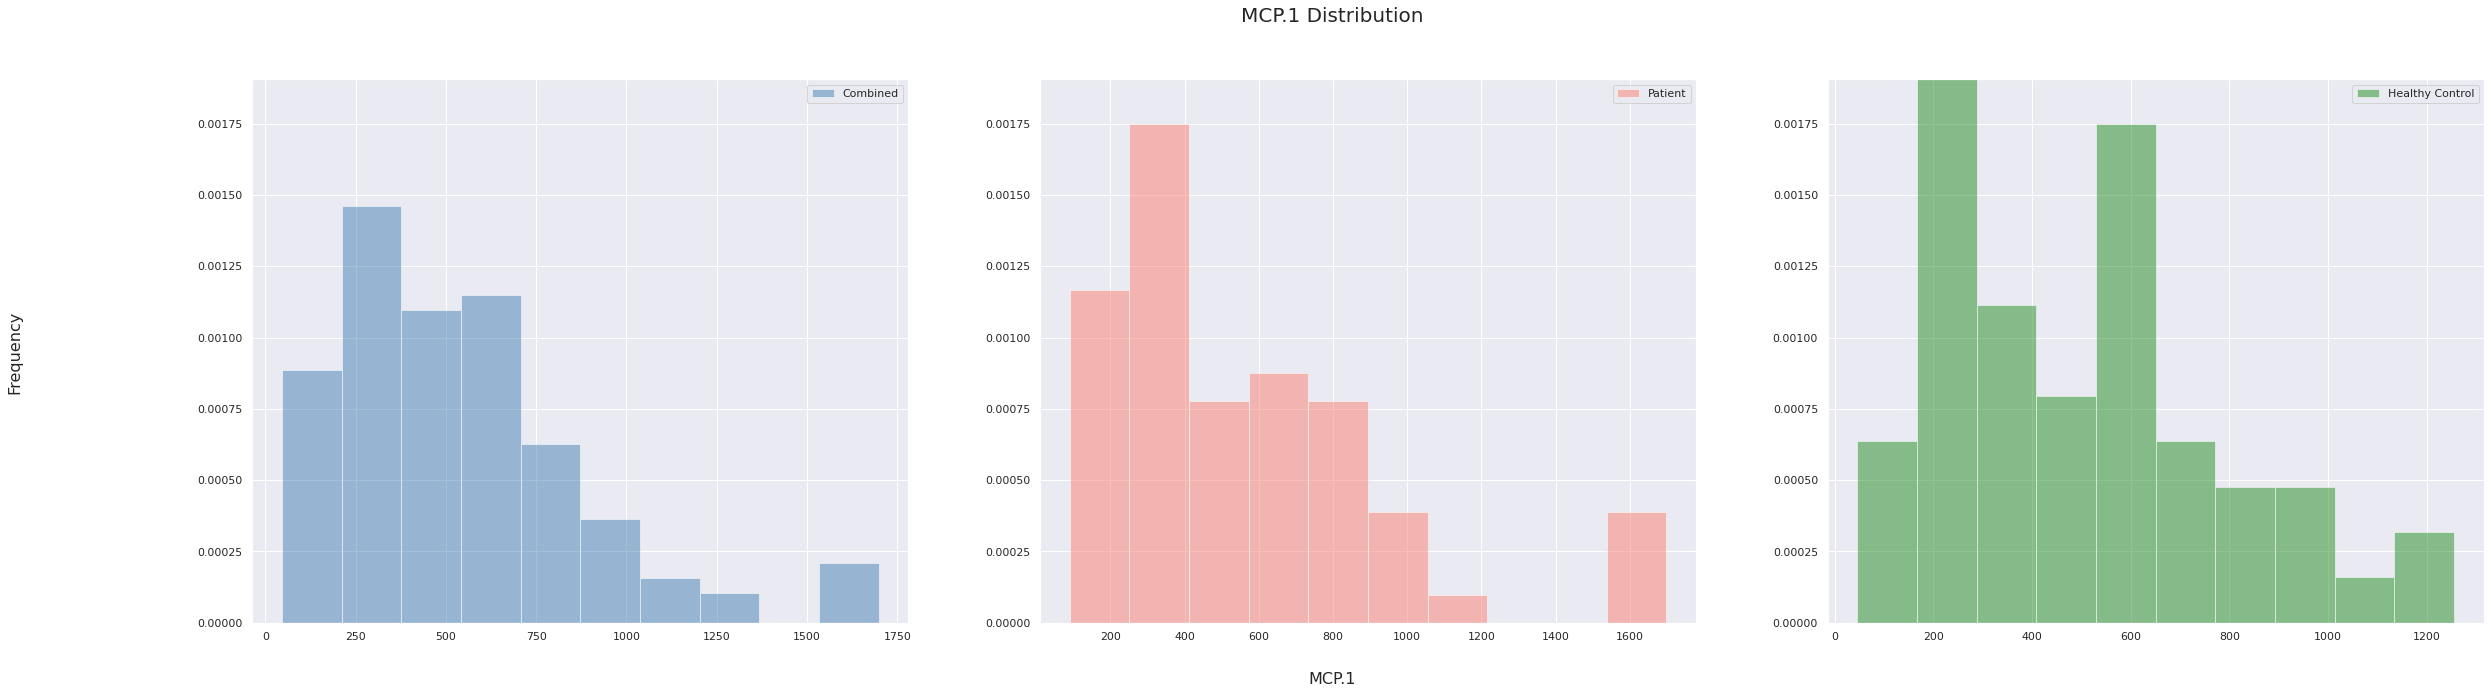

In [107]:
for column in df.columns[:-1]:
    plot_histogram_distribution(df, column, f'{column} Distribution', f'{column}', 'Frequency')

# Data Correlation Analysis

In [41]:
df.corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.008530,0.230106,0.032495,0.127033,0.102626,-0.219813,0.002742,0.013462,-0.043555
BMI,0.008530,1.000000,0.138845,0.145295,0.114480,0.569593,-0.302735,0.195350,0.224038,-0.132586
Glucose,0.230106,0.138845,1.000000,0.504653,0.696212,0.305080,-0.122121,0.291327,0.264879,0.384315
Insulin,0.032495,0.145295,0.504653,1.000000,0.932198,0.301462,-0.031296,0.146731,0.174356,0.276804
HOMA,0.127033,0.114480,0.696212,0.932198,1.000000,0.327210,-0.056337,0.231101,0.259529,0.284012
Leptin,0.102626,0.569593,0.305080,0.301462,0.327210,1.000000,-0.095389,0.256234,0.014009,-0.001078
Adiponectin,-0.219813,-0.302735,-0.122121,-0.031296,-0.056337,-0.095389,1.000000,-0.252363,-0.200694,-0.019490
Resistin,0.002742,0.195350,0.291327,0.146731,0.231101,0.256234,-0.252363,1.000000,0.366474,0.227310
MCP.1,0.013462,0.224038,0.264879,0.174356,0.259529,0.014009,-0.200694,0.366474,1.000000,0.091381
Classification,-0.043555,-0.132586,0.384315,0.276804,0.284012,-0.001078,-0.019490,0.227310,0.091381,1.000000


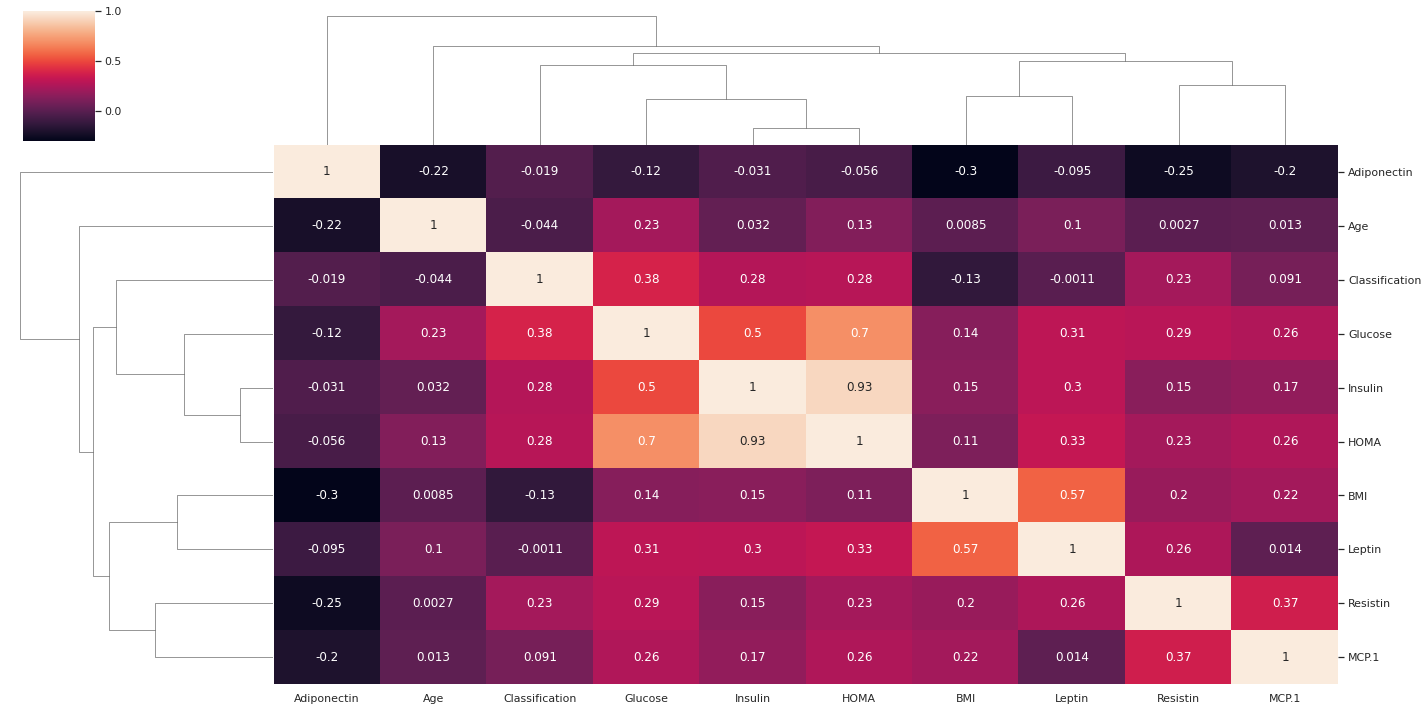

In [42]:
seaborn.clustermap(df.corr(), annot=True, figsize=(20, 10))
plt.show()

In [43]:
df[df['Classification'] == 0].corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,-0.176180,0.221142,-0.006250,0.042411,-0.189287,-0.322010,-0.030198,-0.055342,NaN
BMI,-0.176180,1.000000,0.195587,0.359056,0.336683,0.605315,-0.461177,0.379597,0.290759,NaN
Glucose,0.221142,0.195587,1.000000,0.362250,0.469068,0.279218,-0.085989,0.178739,-0.108909,NaN
Insulin,-0.006250,0.359056,0.362250,1.000000,0.986871,0.358557,-0.155539,0.039139,0.022183,NaN
HOMA,0.042411,0.336683,0.469068,0.986871,1.000000,0.350791,-0.155852,0.049291,-0.013566,NaN
Leptin,-0.189287,0.605315,0.279218,0.358557,0.350791,1.000000,-0.209626,0.548039,0.042823,NaN
Adiponectin,-0.322010,-0.461177,-0.085989,-0.155539,-0.155852,-0.209626,1.000000,-0.203257,-0.217593,NaN
Resistin,-0.030198,0.379597,0.178739,0.039139,0.049291,0.548039,-0.203257,1.000000,0.134229,NaN
MCP.1,-0.055342,0.290759,-0.108909,0.022183,-0.013566,0.042823,-0.217593,0.134229,1.000000,NaN
Classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


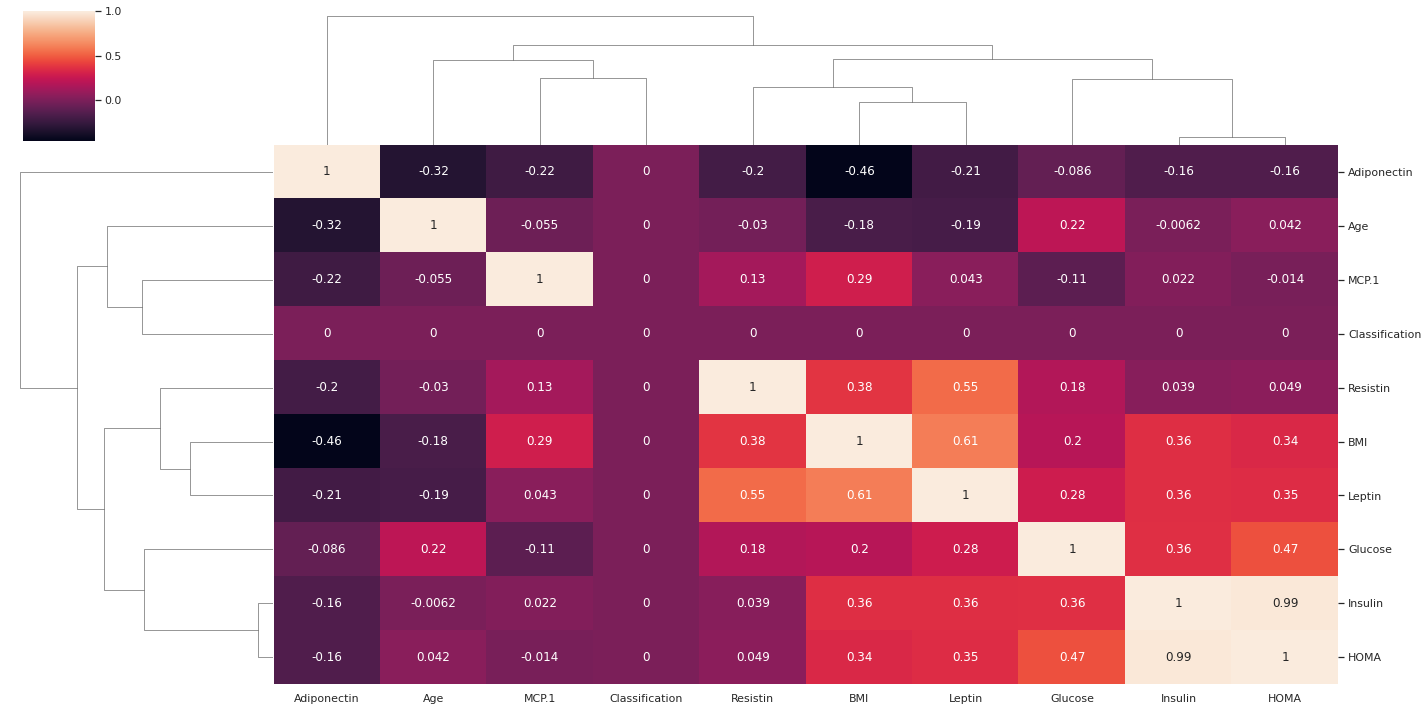

In [44]:
seaborn.clustermap(df[df['Classification'] == 0].corr().fillna(0), annot=True, figsize=(20, 10))
plt.show()

In [45]:
df[df['Classification'] == 1].corr()

,Age,BMI,Glucose,Insulin,HOMA,Leptin,Adiponectin,Resistin,MCP.1,Classification
Age,1.000000,0.241912,0.359848,0.082178,0.228361,0.439923,-0.080242,0.058133,0.082153,NaN
BMI,0.241912,1.000000,0.247906,0.160314,0.154479,0.548415,-0.128815,0.111519,0.211491,NaN
Glucose,0.359848,0.247906,1.000000,0.459591,0.682680,0.384968,-0.163290,0.259339,0.346189,NaN
Insulin,0.082178,0.160314,0.459591,1.000000,0.927059,0.334286,0.018523,0.111282,0.194944,NaN
HOMA,0.228361,0.154479,0.682680,0.927059,1.000000,0.397897,-0.040077,0.226977,0.307044,NaN
Leptin,0.439923,0.548415,0.384968,0.334286,0.397897,1.000000,0.018291,0.053920,-0.003389,NaN
Adiponectin,-0.080242,-0.128815,-0.163290,0.018523,-0.040077,0.018291,1.000000,-0.306866,-0.196351,NaN
Resistin,0.058133,0.111519,0.259339,0.111282,0.226977,0.053920,-0.306866,1.000000,0.482461,NaN
MCP.1,0.082153,0.211491,0.346189,0.194944,0.307044,-0.003389,-0.196351,0.482461,1.000000,NaN
Classification,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


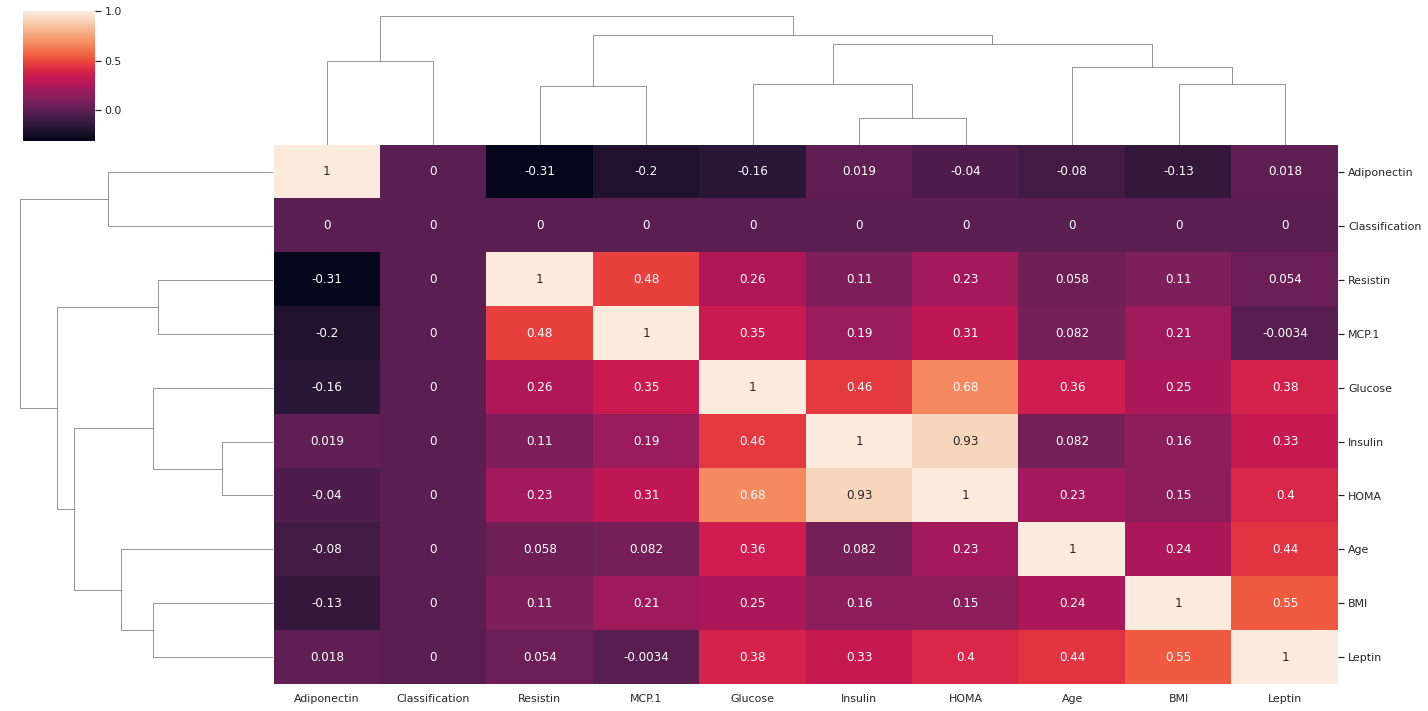

In [46]:
seaborn.clustermap(df[df['Classification'] == 1].corr().fillna(0), annot=True, figsize=(20, 10))
plt.show()